<a href="https://colab.research.google.com/github/fahadshakeel23/DataScience/blob/main/Final_project_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, precision_recall_curve, confusion_matrix, classification_report
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/flight_customer_data.xlsx')

In [ ]:
df.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [ ]:
df.shape

(11760, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
df.columns = df.columns.str.strip()
df.columns.tolist()

['UserID',
 'Taken_product',
 'Yearly_avg_view_on_travel_page',
 'preferred_device',
 'total_likes_on_outstation_checkin_given',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'preferred_location_type',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'following_company_page',
 'montly_avg_comment_on_company_page',
 'working_flag',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [ ]:
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe(include='all').T

count unique    top    freq  \
UserID                                        11760.0    NaN    NaN     NaN   
Taken_product                                   11760      2     No    9864   
Yearly_avg_view_on_travel_page                11179.0    NaN    NaN     NaN   
preferred_device                                11707     10    Tab    4172   
total_likes_on_outstation_checkin_given       11379.0    NaN    NaN     NaN   
yearly_avg_Outstation_checkins                11685.0   30.0    1.0  4543.0   
member_in_family                              11760.0    7.0    3.0  4561.0   
preferred_location_type                         11729     15  Beach    2424   
Yearly_avg_comment_on_travel_page             11554.0    NaN    NaN     NaN   
total_likes_on_outofstation_checkin_received  11760.0    NaN    NaN     NaN   
week_since_last_outstation_checkin            11760.0    NaN    NaN     NaN   
following_company_page                          11657      4     No    8355   
montly_avg_comment_on_company_page            11760.0    NaN    NaN     NaN   
working_flag                                    11760      2     No    9952   
travelling_network_rating                     11760.0    NaN    NaN     NaN   
Adult_flag                                    11760.0    NaN    NaN     NaN   
Daily_Avg_mins_spend_on_traveling_page        11760.0    NaN    NaN     NaN   

                                                      mean           std  \
UserID                                           1005880.5   3394.963917   
Taken_product                                          NaN           NaN   
Yearly_avg_view_on_travel_page                  280.830844     68.182958   
preferred_device                                       NaN           NaN   
total_likes_on_outstation_checkin_given       28170.481765  14385.032134   
yearly_avg_Outstation_checkins                         NaN           NaN   
member_in_family                                       NaN           NaN   
preferred_location_type                                NaN           NaN   
Yearly_avg_comment_on_travel_page                74.790029      24.02665   
total_likes_on_outofstation_checkin_received   6531.699065   4706.613785   
week_since_last_outstation_checkin                3.203571      2.616365   
following_company_page                                 NaN           NaN   
montly_avg_comment_on_company_page               28.661565     48.660504   
working_flag                                           NaN           NaN   
travelling_network_rating                         2.712245      1.080887   
Adult_flag                                        0.793878      0.851823   
Daily_Avg_mins_spend_on_traveling_page           13.817432      9.070657   

                                                    min         25%  \
UserID                                        1000001.0  1002940.75   
Taken_product                                       NaN         NaN   
Yearly_avg_view_on_travel_page                     35.0       232.0   
preferred_device                                    NaN         NaN   
total_likes_on_outstation_checkin_given          3570.0     16380.0   
yearly_avg_Outstation_checkins                      NaN         NaN   
member_in_family                                    NaN         NaN   
preferred_location_type                             NaN         NaN   
Yearly_avg_comment_on_travel_page                   3.0        57.0   
total_likes_on_outofstation_checkin_received     1009.0     2940.75   
week_since_last_outstation_checkin                  0.0         1.0   
following_company_page                              NaN         NaN   
montly_avg_comment_on_company_page                 11.0        17.0   
working_flag                                        NaN         NaN   
travelling_network_rating                           1.0         2.0   
Adult_flag                                          0.0         0.0   
Daily_Avg_mins_spend_on_traveling_page           

Univariate Analysis

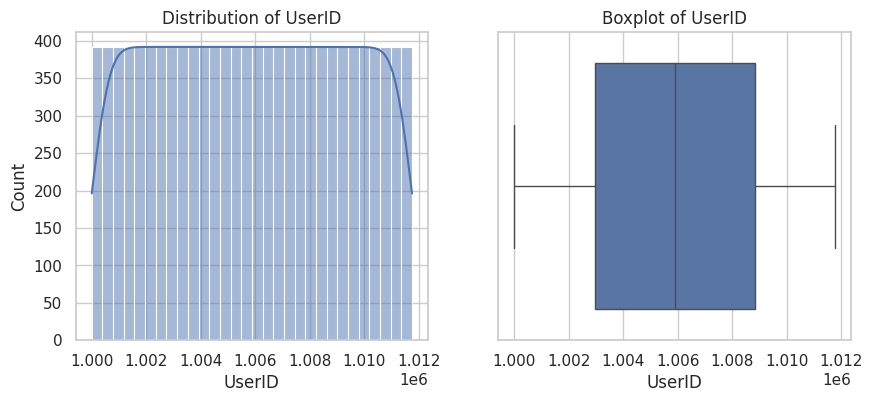

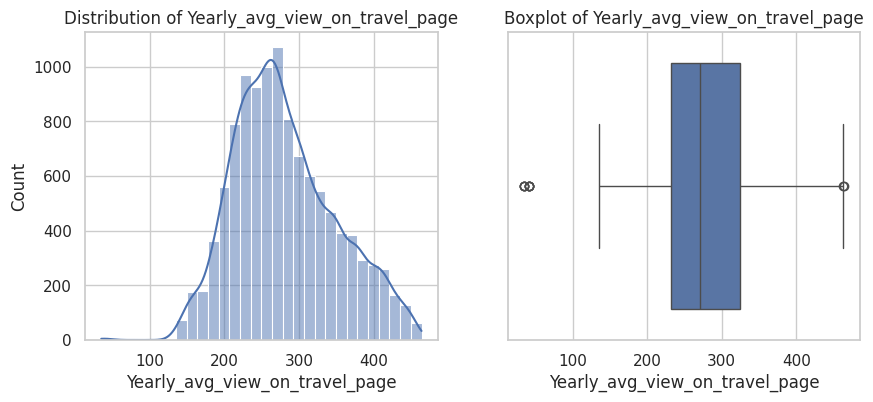

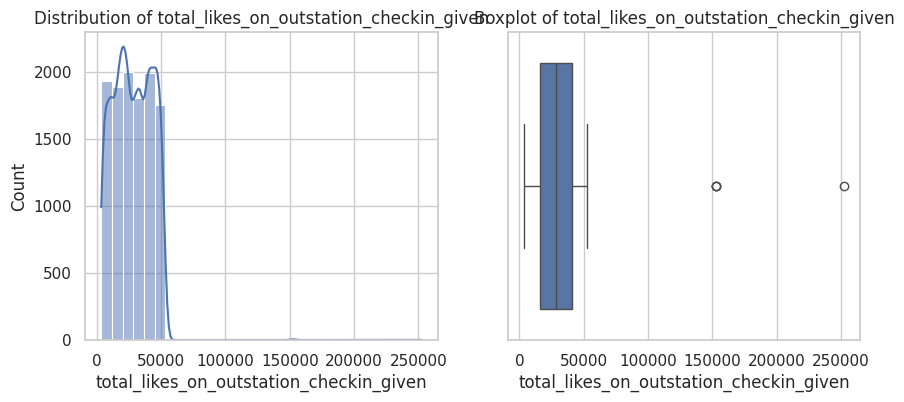

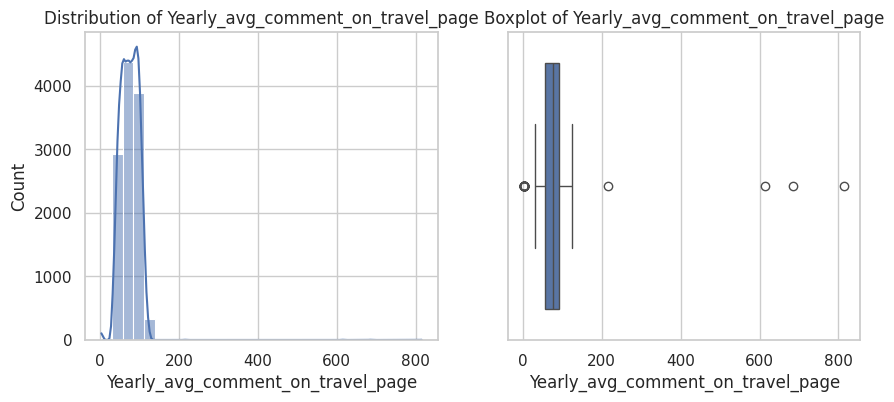

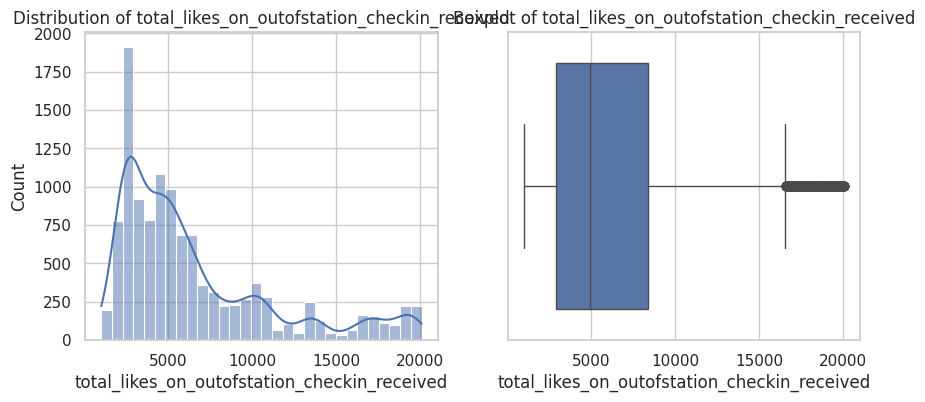

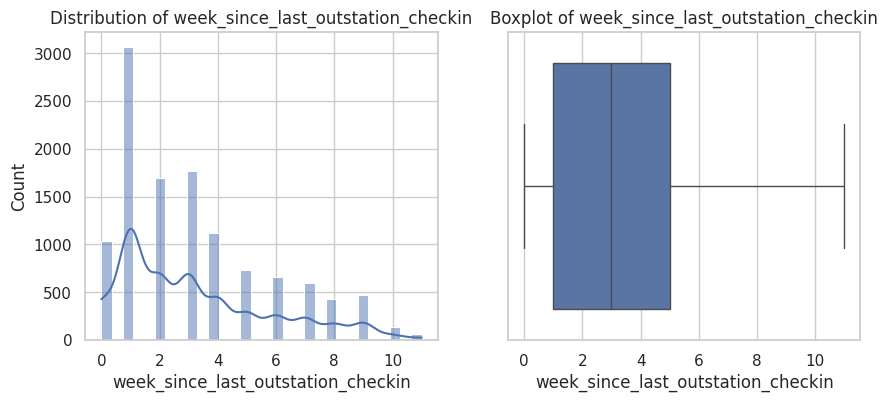

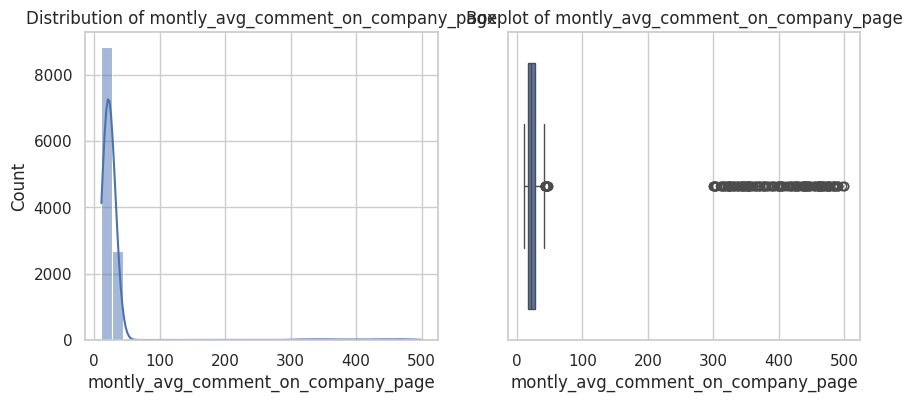

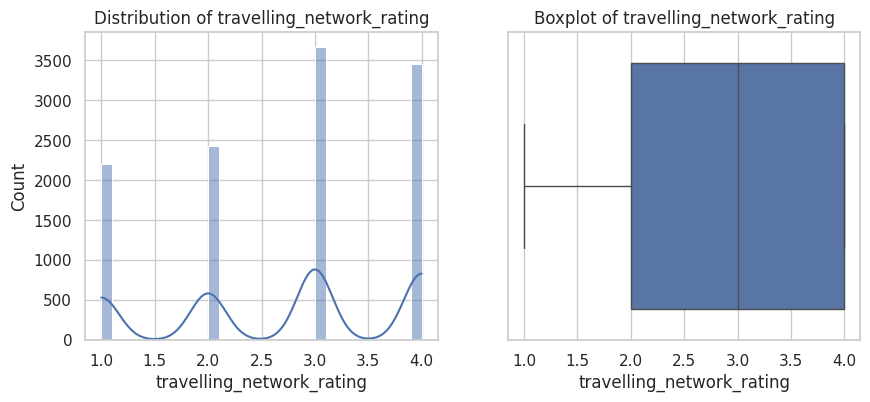

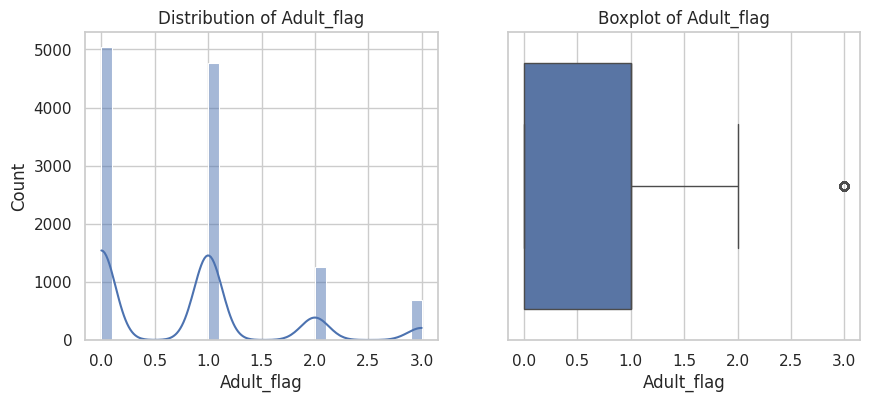

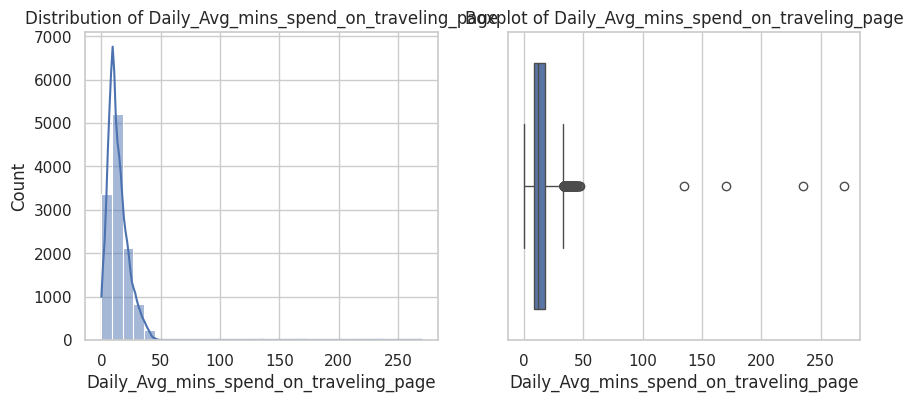

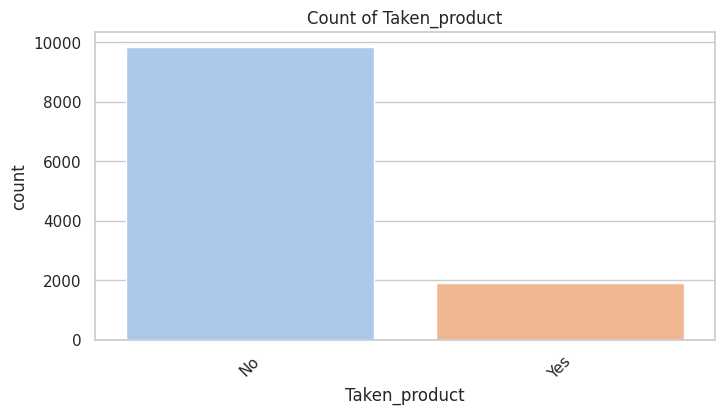

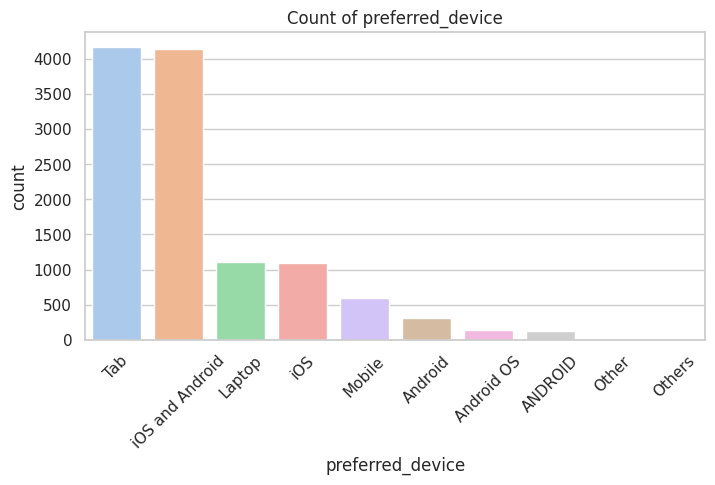

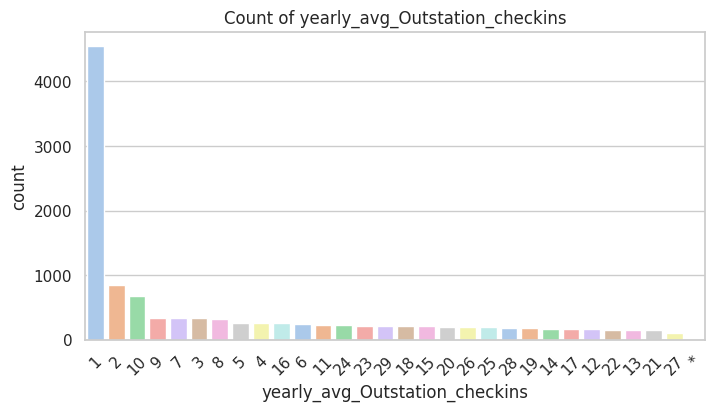

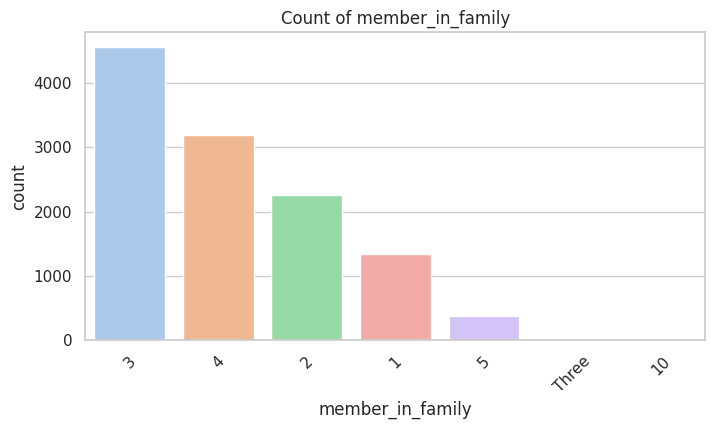

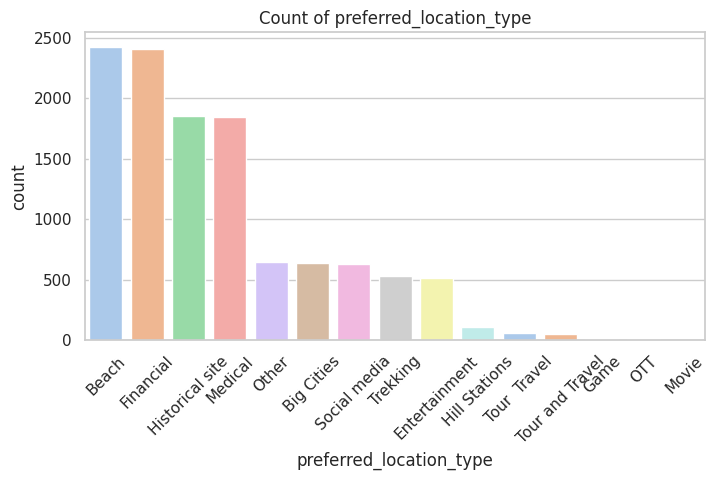

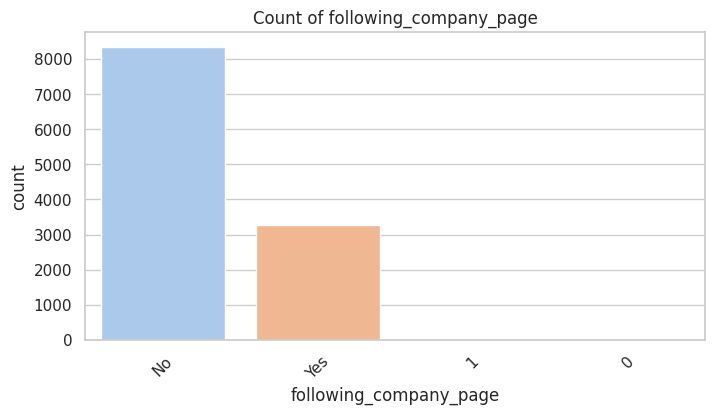

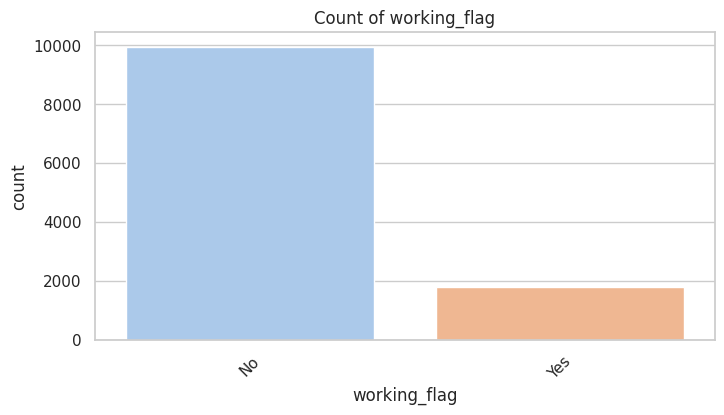

In [ ]:
# Function for Univariate Analysis
def plot_univariate(df):
    """
    Creates histograms/boxplots for numeric features
    and countplots for categorical features.
    """
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # ---- Numeric ----
    for col in numeric_cols:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

    # ---- Categorical ----
    for col in categorical_cols:
        plt.figure(figsize=(8,4))
        order = df[col].value_counts().index
        sns.countplot(data=df, x=col, order=order, palette="pastel")
        plt.title(f"Count of {col}")
        plt.xticks(rotation=45)
        plt.show()

# Run for the dataset
plot_univariate(df)

Bivariate analysis

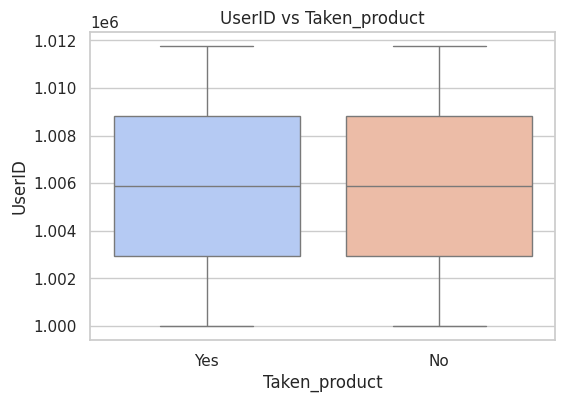

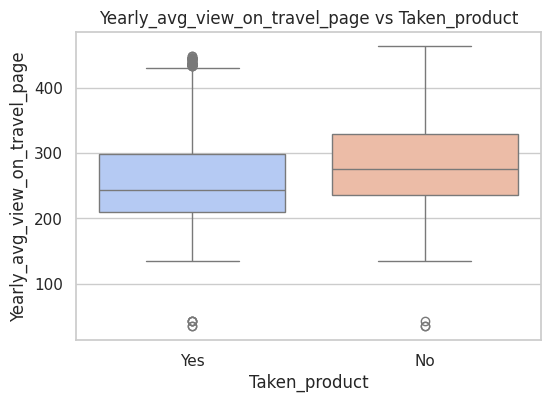

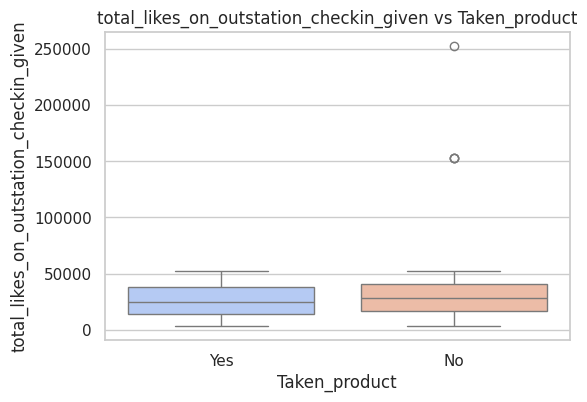

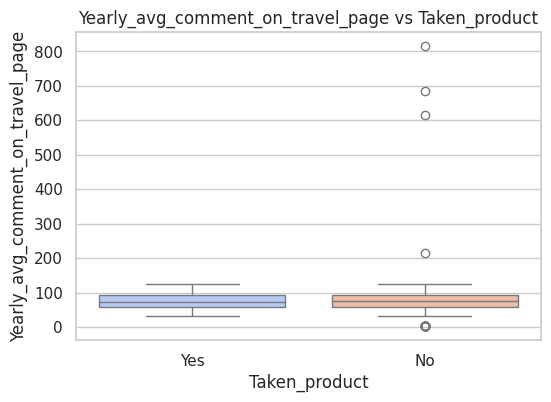

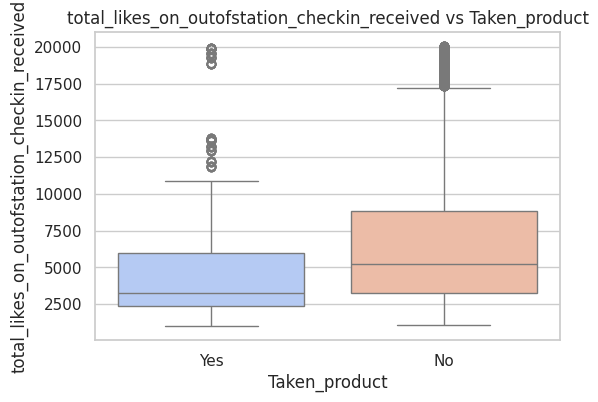

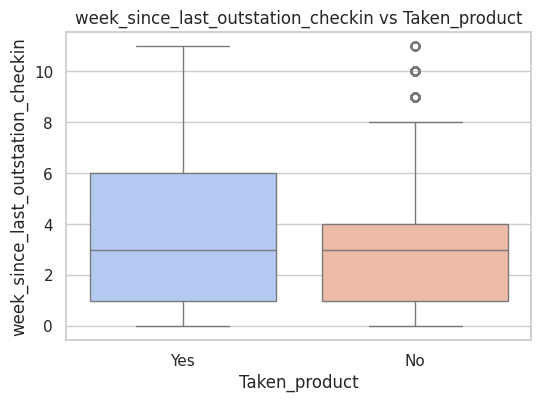

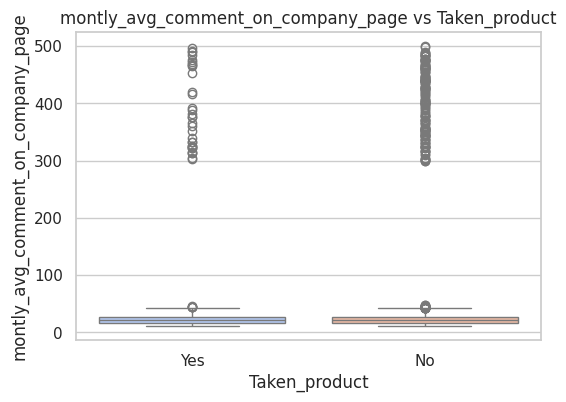

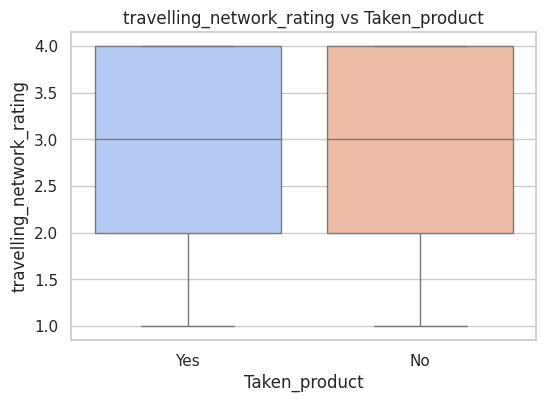

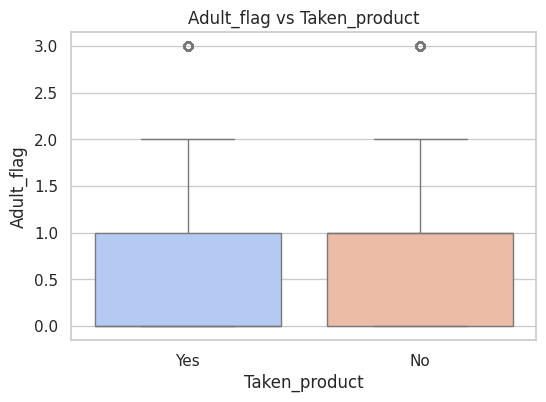

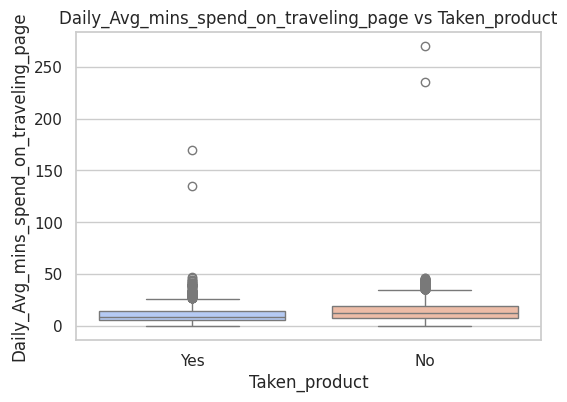

<Figure size 600x400 with 0 Axes>

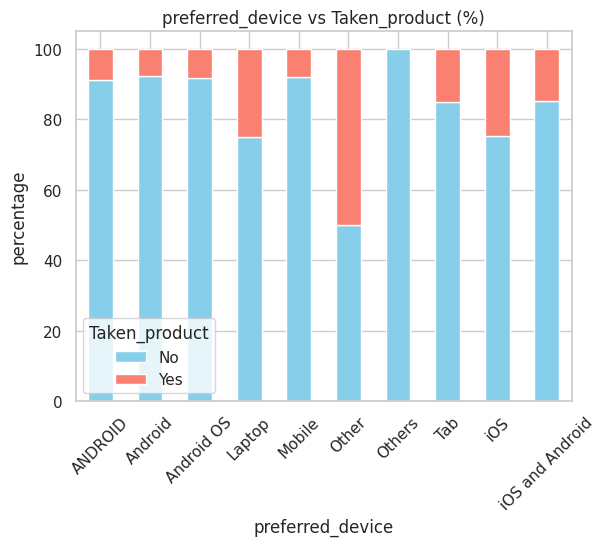

<Figure size 600x400 with 0 Axes>

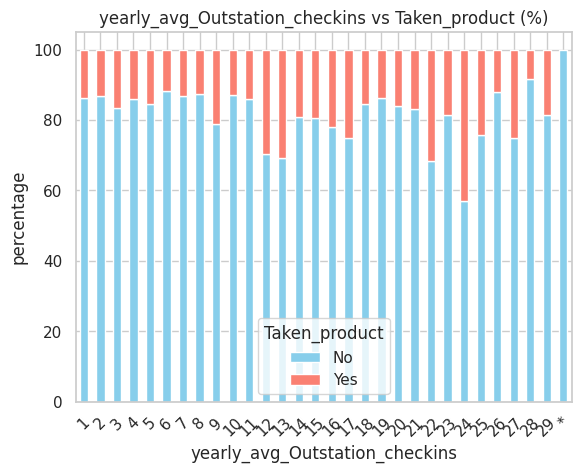

<Figure size 600x400 with 0 Axes>

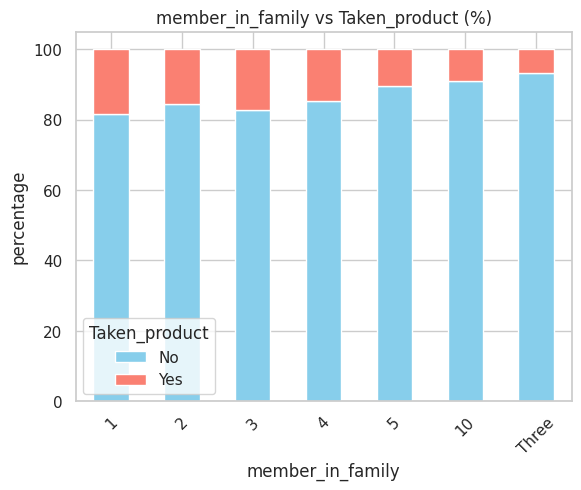

<Figure size 600x400 with 0 Axes>

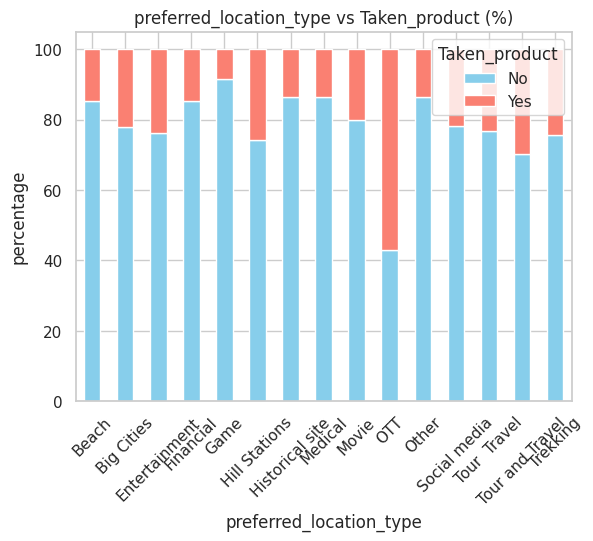

<Figure size 600x400 with 0 Axes>

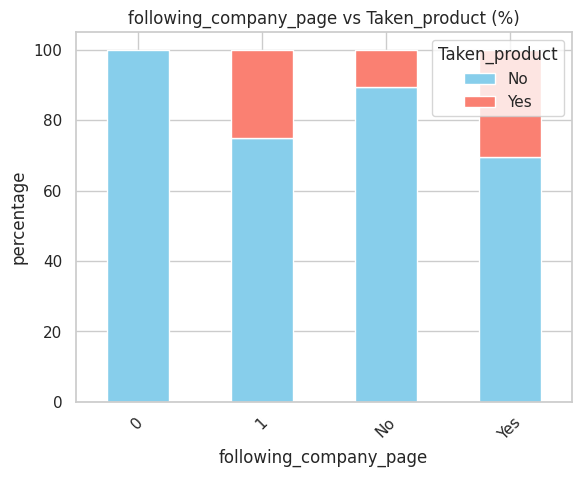

<Figure size 600x400 with 0 Axes>

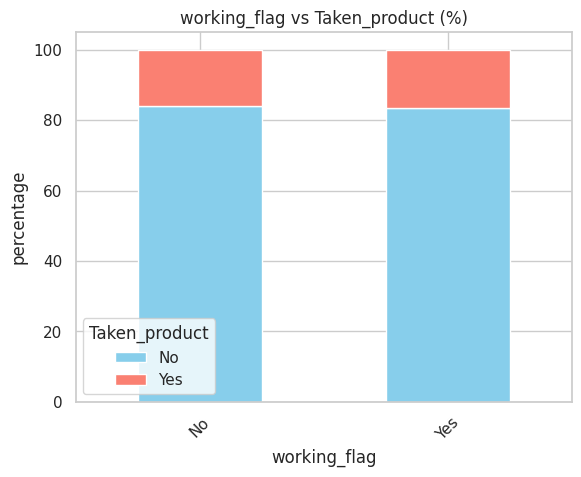

In [ ]:
def plot_bivariate(df, target='Taken_product'):
    """
    Numeric vs target -> boxplot
    categorical vs target -> stacked percentage bar
    """
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns.drop(target, errors='ignore')

    # ---- Numeric ----
    for col in numeric_cols:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=target, y=col, data=df, palette="coolwarm")
        plt.title(f"{col} vs {target}")
        plt.show()

    # --- Categorical vs Target ---
    for col in categorical_cols:
        plt.figure(figsize=(6,4))
        cross = pd.crosstab(df[col], df[target], normalize='index') * 100
        cross.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
        plt.title(f"{col} vs {target} (%)")
        plt.ylabel('percentage')
        plt.xticks(rotation=45)
        plt.show()

plot_bivariate(df, target='Taken_product')

Multivariate Analysis

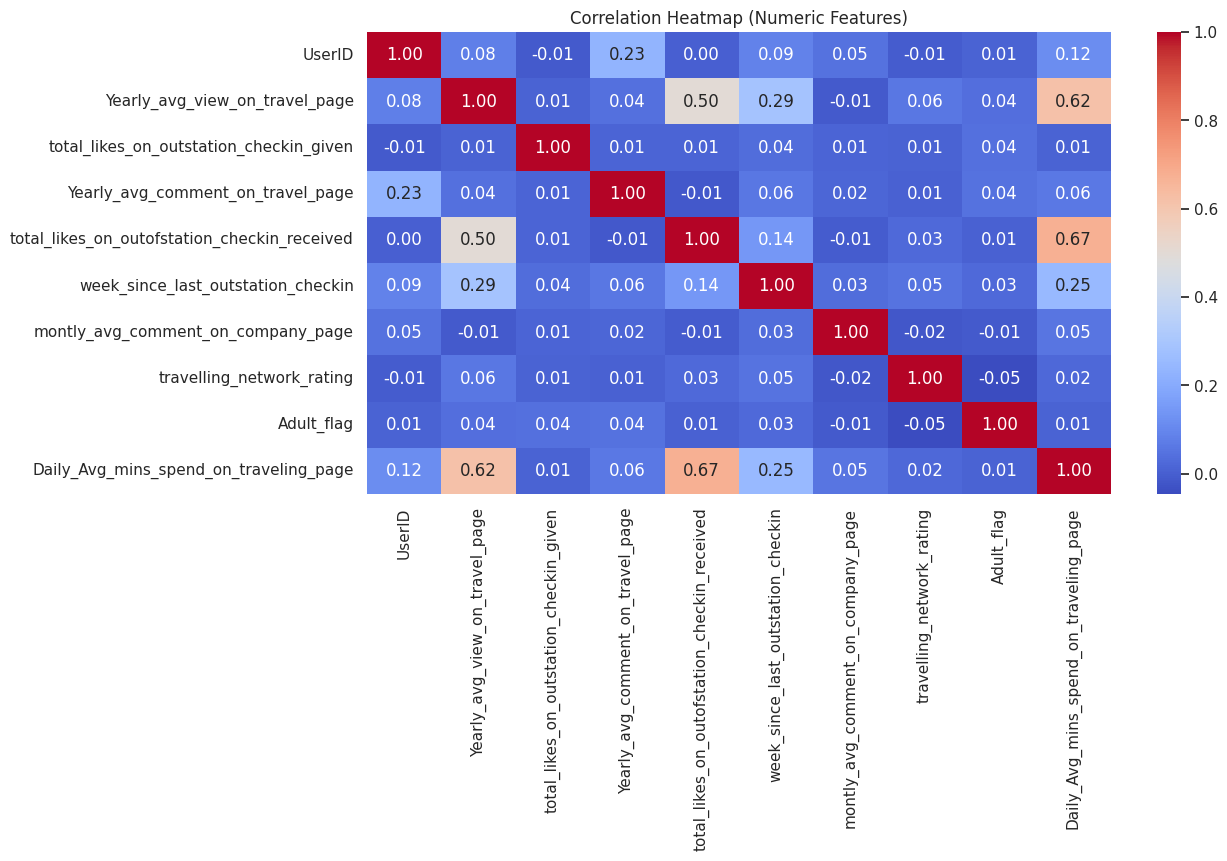

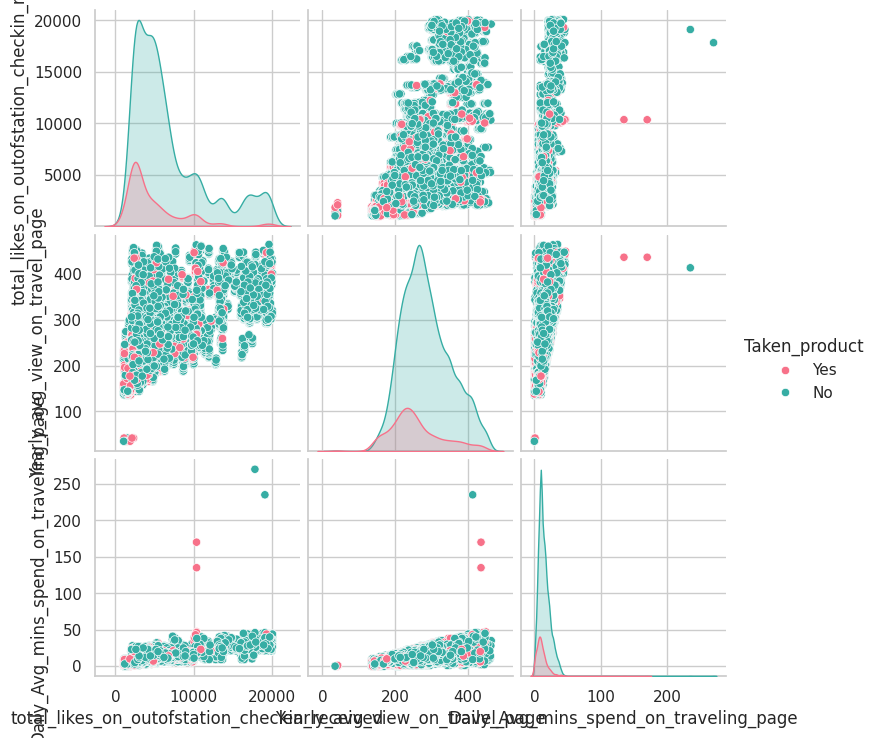

In [ ]:
# Function for Multivariate Analysis
def plot_multivariate(df):
    """
    Plots correlation heatmap & pairplot for top correlated numeric features.
    """
    numeric_df = df.select_dtypes(include=['int64','float64'])

    # Correlation matrix
    corr = numeric_df.corr()
    plt.figure(figsize=(12,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.show()

    # Pairplot for top correlated vars (optional)
    top_corr = corr.abs().unstack().sort_values(ascending=False)
    top_corr_pairs = top_corr[(top_corr < 1)].head(5).index
    top_cols = list(set([i for pair in top_corr_pairs for i in pair]))
    sns.pairplot(df[top_cols + ['Taken_product']], hue='Taken_product', diag_kind='kde', palette='husl')
    plt.show()

# Run Multivariate
plot_multivariate(df)


DATA PREPROCESSING

Missing Value Treatment

In [ ]:
df.shape

(11760, 17)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(11760, 17)

In [ ]:
# Quick anomaly scan for numeric values
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols].describe(percentiles=[.01,.05,.95,.99])

UserID  Yearly_avg_view_on_travel_page  \
count  1.176000e+04                    11179.000000   
mean   1.005880e+06                      280.830844   
std    3.394964e+03                       68.182958   
min    1.000001e+06                       35.000000   
1%     1.000119e+06                      151.000000   
5%     1.000589e+06                      182.000000   
50%    1.005880e+06                      271.000000   
95%    1.011172e+06                      411.000000   
99%    1.011642e+06                      445.000000   
max    1.011760e+06                      464.000000   

       total_likes_on_outstation_checkin_given  \
count                             11379.000000   
mean                              28170.481765   
std                               14385.032134   
min                                3570.000000   
1%                                 4112.900000   
5%                                 5854.000000   
50%                               28076.000000   
95%                               49945.500000   
99%                               52011.660000   
max                              252430.000000   

       Yearly_avg_comment_on_travel_page  \
count                       11554.000000   
mean                           74.790029   
std                            24.026650   
min                             3.000000   
1%                             33.000000   
5%                             41.000000   
50%                            75.000000   
95%                           108.000000   
99%                           117.000000   
max                           815.000000   

       total_likes_on_outofstation_checkin_received  \
count                                  11760.000000   
mean                                    6531.699065   
std                                     4706.613785   
min                                     1009.000000   
1%                                      1396.540000   
5%                                      2132.000000   
50%                                     4948.000000   
95%                                    17861.000000   
99%                                    19659.230000   
max                                    20065.000000   

       week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
count                        11760.000000                        11760.000000   
mean                             3.203571                           28.661565   
std                              2.616365                           48.660504   
min                              0.000000                           11.000000   
1%                               0.000000                           11.000000   
5%                               0.000000                           12.000000   
50%                              3.000000                           22.000000   
95%                              9.000000                           36.000000   
99%                             10.000000                          371.000000   
max                             11.000000                          500.000000   

       travelling_network_rating    Adult_flag  \
count               11760.000000  11760.000000   
mean                    2.712245      0.793878   
std                     1.080887      0.851823   
min                     1.000000      0.000000   
1%                      1.000000      0.000000   
5%                      1.000000      0.000000   
50%                     3.000000      1.000000   
95%                     4.000000      3.000000   
99%                     4.000000      3.000000   
max                     4.000000      3.000000   

       Daily_Avg_mins_spend_on_traveling_page  
count                            11760.000000  
mean                                13.817432  
std                                  9.070657  
min                                  0.000000  
1%                                   1.000000  
5%                                

In [ ]:
missing = df.isnull().mean().sort_values(ascending=False)
print("Missing value ratio:\n", missing)

Missing value ratio:
 Yearly_avg_view_on_travel_page                  0.049405
total_likes_on_outstation_checkin_given         0.032398
Yearly_avg_comment_on_travel_page               0.017517
following_company_page                          0.008759
yearly_avg_Outstation_checkins                  0.006378
preferred_device                                0.004507
preferred_location_type                         0.002636
UserID                                          0.000000
Taken_product                                   0.000000
member_in_family                                0.000000
total_likes_on_outofstation_checkin_received    0.000000
week_since_last_outstation_checkin              0.000000
montly_avg_comment_on_company_page              0.000000
working_flag                                    0.000000
travelling_network_rating                       0.000000
Adult_flag                                      0.000000
Daily_Avg_mins_spend_on_traveling_page          0.000000
dtype: fl

In [ ]:
# Numeric → median | Categorical → mode
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

Outlier Detection & Treatment

In [ ]:
# IQR method to cap outliers at 1st & 99th percentile
for col in numeric_cols:
    low, high = df[col].quantile(0.01), df[col].quantile(0.99)
    df[col] = np.clip(df[col], low, high)

print("✅ Outliers capped (1st–99th percentile).")


✅ Outliers capped (1st–99th percentile).


Feature Engineering

In [ ]:
# Convert object numerics
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce')
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce')

# Engagement ratio
df['engagement_ratio'] = (
    df['total_likes_on_outofstation_checkin_received'] /
    (df['total_likes_on_outstation_checkin_given'] + 1)
)

# Recency bucket
df['recency_bucket'] = pd.cut(
    df['week_since_last_outstation_checkin'],
    bins=[0,4,8,12,52],
    labels=['Very Recent','Recent','Moderate','Inactive']
)

# Log-transform highly skewed vars (optional)
df['log_avg_views'] = np.log1p(df['Yearly_avg_view_on_travel_page'])
df['log_daily_mins'] = np.log1p(df['Daily_Avg_mins_spend_on_traveling_page'])

print("✅ Feature engineering complete.")


✅ Feature engineering complete.


Encoding Categorical Variables

In [ ]:
binary_map = {'Yes':1, 'No':0}
df['Taken_product'] = df['Taken_product'].map(binary_map)
df['following_company_page'] = df['following_company_page'].map(binary_map)
df['working_flag'] = df['working_flag'].map(binary_map)

cat_cols = ['preferred_device', 'preferred_location_type', 'recency_bucket']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("✅ Encoding done. Columns:", df.shape[1])

✅ Encoding done. Columns: 44


Class Imbalance Check

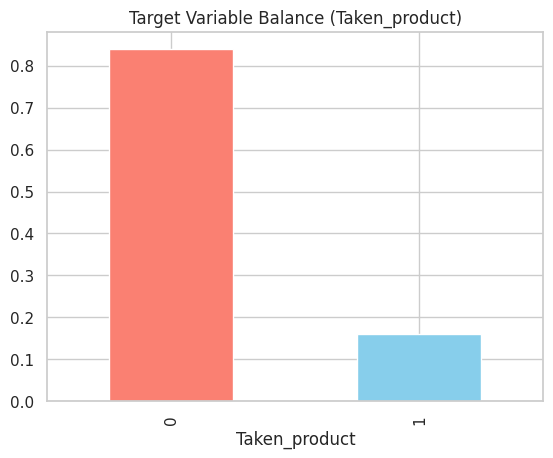

Target ratio:
 Taken_product
0    0.838776
1    0.161224
Name: proportion, dtype: float64


In [ ]:
# Target distribution
df['Taken_product'].value_counts(normalize=True).plot(kind='bar', color=['salmon','skyblue'])
plt.title('Target Variable Balance (Taken_product)')
plt.show()

# If imbalance > 70-30 → flag for SMOTE later
target_ratio = df['Taken_product'].value_counts(normalize=True)
print("Target ratio:\n", target_ratio)


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Taken_product','UserID'], axis=1)
y = df['Taken_product']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Scaling complete.")


✅ Scaling complete.


Split Laptop vs Mobile and Train/Test

In [ ]:
# Device split (based on raw column before encoding)
raw_df = pd.read_excel('/content/drive/MyDrive/flight_customer_data.xlsx')

laptop_df = raw_df[raw_df['preferred_device'].str.contains('Laptop', case=False, na=False)]
mobile_df = raw_df[raw_df['preferred_device'].str.contains('iOS|Android', case=False, na=False)]

print("Laptop users:", laptop_df.shape, " Mobile users:", mobile_df.shape)

from sklearn.model_selection import train_test_split

def prepare_split(df):
    df = df.copy()
    df['Taken_product'] = df['Taken_product'].map({'Yes':1,'No':0})
    X = df.drop(['Taken_product','UserID'], axis=1)
    y = df['Taken_product']
    X = pd.get_dummies(X, drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    return X_train, X_test, y_train, y_test

X_train_l, X_test_l, y_train_l, y_test_l = prepare_split(laptop_df)
X_train_m, X_test_m, y_train_m, y_test_m = prepare_split(mobile_df)

print("✅ Data split – Laptop and Mobile ready for modeling.")


Laptop users: (1108, 17)  Mobile users: (5823, 17)
✅ Data split – Laptop and Mobile ready for modeling.


Data Leakage Check

In [ ]:
# Ensure no future info used (no target leak, all engineered features valid)
print("No columns derived from Taken_product or post-event variables. Safe to model.")


No columns derived from Taken_product or post-event variables. Safe to model.


In [ ]:
def clean_missing(X_train, X_test):
    imputer = SimpleImputer(strategy='median')
    X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
    return X_train, X_test

# Apply to both segments
X_train_l, X_test_l = clean_missing(X_train_l, X_test_l)
X_train_m, X_test_m = clean_missing(X_train_m, X_test_m)

print("✅ Remaining NaNs handled via median imputation.")
print("Laptop missing values:", X_train_l.isnull().sum().sum())
print("Mobile missing values:", X_train_m.isnull().sum().sum())

✅ Remaining NaNs handled via median imputation.
Laptop missing values: 0
Mobile missing values: 0


Baseline Model (Logistic Regression)

In [ ]:
def train_logreg(X_train, y_train, class_weight='balanced', C=1.0, penalty='l2', solver='liblinear', max_iter=1000):
    """
    Trains a baseline Logistic Regression classifier.
    Uses class_weight='balanced' to handle class imbalance.
    """
    model = LogisticRegression(
        class_weight=class_weight,
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=max_iter,
        n_jobs=None
    )
    model.fit(X_train, y_train)
    return model

def evaluate_classifier(model, X_train, y_train, X_test, y_test, label="Model"):
    """
    Prints metrics and returns a dict of results.
    Also draws Confusion Matrix, ROC Curve, and Precision-Recall Curve.
    """
    # Predictions
    y_tr_prob = model.predict_proba(X_train)[:, 1]
    y_te_prob = model.predict_proba(X_test)[:, 1]
    y_tr_pred = (y_tr_prob >= 0.5).astype(int)
    y_te_pred = (y_te_prob >= 0.5).astype(int)

    # Metrics
    metrics = {
        "label": label,
        "train_accuracy": accuracy_score(y_train, y_tr_pred),
        "test_accuracy": accuracy_score(y_test, y_te_pred),
        "train_precision": precision_score(y_train, y_tr_pred, zero_division=0),
        "test_precision": precision_score(y_test, y_te_pred, zero_division=0),
        "train_recall": recall_score(y_train, y_tr_pred, zero_division=0),
        "test_recall": recall_score(y_test, y_te_pred, zero_division=0),
        "train_f1": f1_score(y_train, y_tr_pred, zero_division=0),
        "test_f1": f1_score(y_test, y_te_pred, zero_division=0),
        "train_roc_auc": roc_auc_score(y_train, y_tr_prob),
        "test_roc_auc": roc_auc_score(y_test, y_te_prob),
    }
    print(f"\n===== {label} — Classification Report (Test) =====")
    print(classification_report(y_test, y_te_pred, zero_division=0, digits=4))

    # Confusion Matrix (Test)
    cm = confusion_matrix(y_test, y_te_pred)
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest')
    plt.title(f'{label} — Confusion Matrix (Test)')
    plt.xlabel('Predicted'); plt.ylabel('Actual')
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')
    plt.tight_layout()
    plt.show()

    # ROC Curve (Test)
    fpr, tpr, _ = roc_curve(y_test, y_te_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f'AUC = {metrics["test_roc_auc"]:.3f}')
    plt.plot([0,1], [0,1], linestyle='--')
    plt.title(f'{label} — ROC Curve (Test)')
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Precision-Recall Curve (Test)
    prec, rec, _ = precision_recall_curve(y_test, y_te_prob)
    plt.figure(figsize=(5,4))
    plt.plot(rec, prec)
    plt.title(f'{label} — Precision-Recall Curve (Test)')
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.tight_layout()
    plt.show()

    return metrics, y_te_prob, y_te_pred

def show_top_coefficients(model, feature_names, k=15):
    """
    Displays top positive and negative coefficients (strongest drivers).
    """
    coefs = pd.Series(model.coef_.ravel(), index=feature_names).sort_values()
    neg = coefs.head(k)
    pos = coefs.tail(k)

    print("\nTop Negative Drivers (decrease propensity):")
    display(neg.to_frame('coefficient'))
    print("\nTop Positive Drivers (increase propensity):")
    display(pos.to_frame('coefficient'))


Train Baseline — Laptop Segment


===== Baseline Logistic — Laptop — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9252    0.8144    0.8662       167
           1     0.5867    0.8000    0.6769        55

    accuracy                         0.8108       222
   macro avg     0.7559    0.8072    0.7716       222
weighted avg     0.8413    0.8108    0.8193       222



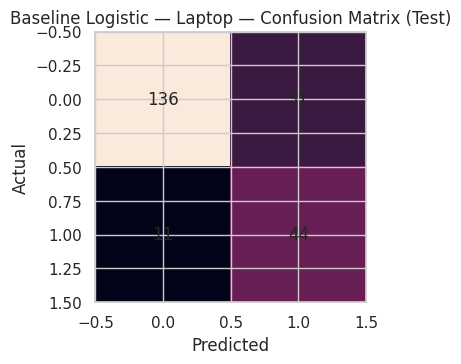

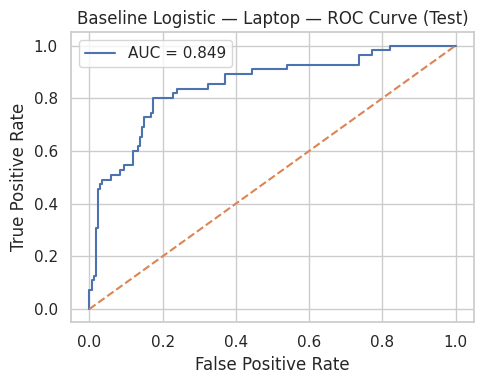

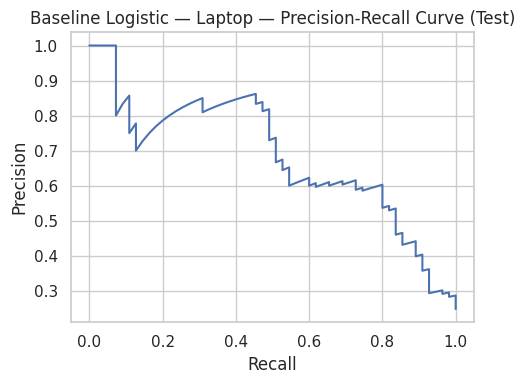


Top Negative Drivers (decrease propensity):


coefficient
yearly_avg_Outstation_checkins_11          -1.623110
yearly_avg_Outstation_checkins_2           -1.434602
preferred_location_type_Other              -1.095935
yearly_avg_Outstation_checkins_21          -1.026382
preferred_location_type_Historical site    -0.894322
yearly_avg_Outstation_checkins_5           -0.876624
yearly_avg_Outstation_checkins_10          -0.863094
Adult_flag                                 -0.578107
member_in_family_5                         -0.536698
yearly_avg_Outstation_checkins_20          -0.416460
travelling_network_rating                  -0.409463
yearly_avg_Outstation_checkins_13          -0.362331
yearly_avg_Outstation_checkins_25          -0.352584
yearly_avg_Outstation_checkins_27          -0.246475
yearly_avg_Outstation_checkins_6           -0.230653


Top Positive Drivers (increase propensity):


coefficient
member_in_family_4                        0.523650
yearly_avg_Outstation_checkins_9          0.555952
preferred_location_type_Trekking          0.562857
yearly_avg_Outstation_checkins_28         0.752315
preferred_location_type_Hill Stations     0.795622
yearly_avg_Outstation_checkins_17         0.850071
yearly_avg_Outstation_checkins_24         0.876564
yearly_avg_Outstation_checkins_15         0.931082
yearly_avg_Outstation_checkins_8          0.988285
yearly_avg_Outstation_checkins_26         1.097749
member_in_family_2                        1.154791
member_in_family_3                        1.191189
following_company_page_Yes                1.719241
yearly_avg_Outstation_checkins_12         1.724966
yearly_avg_Outstation_checkins_29         2.076324

label  train_accuracy  test_accuracy  train_precision  \
0  Baseline Logistic — Laptop        0.810384       0.810811         0.583596   

   test_precision  train_recall  test_recall  train_f1   test_f1  \
0        0.586667      0.837104          0.8  0.687732  0.676923   

   train_roc_auc  test_roc_auc  
0       0.895322      0.848666

In [ ]:
log_laptop = train_logreg(X_train_l, y_train_l, class_weight='balanced', solver='liblinear', C=1.0)
laptop_metrics, laptop_probs, laptop_preds = evaluate_classifier(
    log_laptop, X_train_l, y_train_l, X_test_l, y_test_l, label="Baseline Logistic — Laptop"
)

# Coefficients (feature importance)
show_top_coefficients(log_laptop, X_train_l.columns, k=15)

# Keep a neat summary row
laptop_summary = pd.DataFrame([laptop_metrics])
display(laptop_summary)


Train Baseline — Mobile Segment


===== Baseline Logistic — Mobile — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9280    0.7249    0.8140       978
           1     0.3292    0.7059    0.4490       187

    accuracy                         0.7219      1165
   macro avg     0.6286    0.7154    0.6315      1165
weighted avg     0.8319    0.7219    0.7554      1165



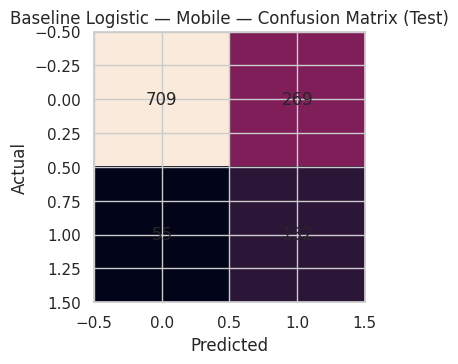

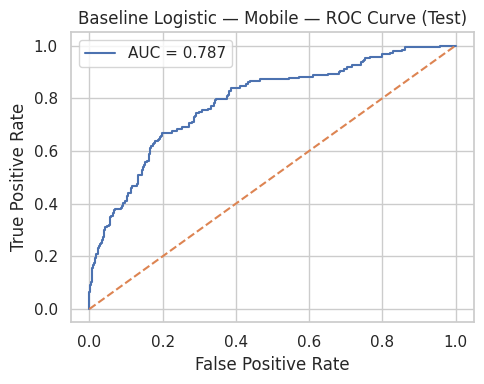

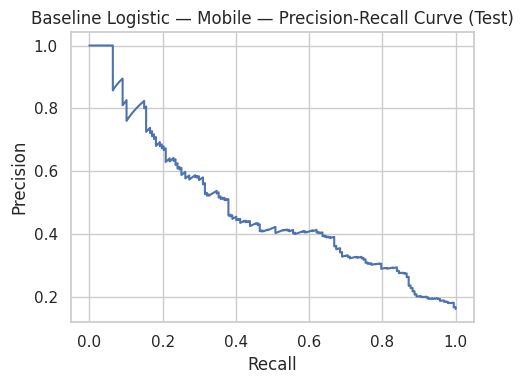


Top Negative Drivers (decrease propensity):


coefficient
preferred_location_type_Other        -0.814797
preferred_location_type_Financial    -0.632545
Adult_flag                           -0.530127
preferred_location_type_Medical      -0.490057
preferred_device_Android OS          -0.246437
yearly_avg_Outstation_checkins_26    -0.221061
following_company_page_No            -0.183869
preferred_device_Android             -0.172561
travelling_network_rating            -0.150671
yearly_avg_Outstation_checkins_19    -0.143732
yearly_avg_Outstation_checkins_28    -0.111916
member_in_family_5                   -0.103835
yearly_avg_Outstation_checkins_10    -0.103327
working_flag_Yes                     -0.101259
member_in_family_10                  -0.099807


Top Positive Drivers (increase propensity):


coefficient
preferred_location_type_Social media     0.294708
preferred_location_type_OTT              0.295445
yearly_avg_Outstation_checkins_16        0.364043
yearly_avg_Outstation_checkins_13        0.380701
yearly_avg_Outstation_checkins_21        0.398590
yearly_avg_Outstation_checkins_17        0.406533
yearly_avg_Outstation_checkins_15        0.492446
yearly_avg_Outstation_checkins_22        0.516283
yearly_avg_Outstation_checkins_23        0.530205
yearly_avg_Outstation_checkins_12        0.532773
yearly_avg_Outstation_checkins_29        0.536898
preferred_device_iOS and Android         0.542945
preferred_device_iOS                     1.211225
following_company_page_Yes               1.249520
yearly_avg_Outstation_checkins_24        1.374219

label  train_accuracy  test_accuracy  train_precision  \
0  Baseline Logistic — Mobile        0.721125       0.721888         0.332315   

   test_precision  train_recall  test_recall  train_f1  test_f1  \
0        0.329177      0.725333     0.705882  0.455802  0.44898   

   train_roc_auc  test_roc_auc  
0       0.797538      0.786539

In [ ]:
log_mobile = train_logreg(X_train_m, y_train_m, class_weight='balanced', solver='liblinear', C=1.0)
mobile_metrics, mobile_probs, mobile_preds = evaluate_classifier(
    log_mobile, X_train_m, y_train_m, X_test_m, y_test_m, label="Baseline Logistic — Mobile"
)

# Coefficients (feature importance)
show_top_coefficients(log_mobile, X_train_m.columns, k=15)

# Keep a neat summary row
mobile_summary = pd.DataFrame([mobile_metrics])
display(mobile_summary)


Baseline Model Comparison Table (Laptop vs Mobile)

In [ ]:
baseline_compare = pd.concat([laptop_summary, mobile_summary], ignore_index=True)
display(
    baseline_compare[[
        'label', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc'
    ]]
)

label  test_accuracy  test_precision  test_recall  \
0  Baseline Logistic — Laptop       0.810811        0.586667     0.800000   
1  Baseline Logistic — Mobile       0.721888        0.329177     0.705882   

    test_f1  test_roc_auc  
0  0.676923      0.848666  
1  0.448980      0.786539

ADVANCED MODELS

In [ ]:
def train_and_evaluate(model, X_train, y_train, X_test, y_test, label):
    model.fit(X_train, y_train)
    metrics, y_probs, y_preds = evaluate_classifier(model, X_train, y_train, X_test, y_test, label)
    return metrics

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42, class_weight='balanced'),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=150, learning_rate=0.1, max_depth=5,
        eval_metric='logloss', use_label_encoder=False, random_state=42)
}

Train Models – Laptop Segment


 Training Decision Tree on Laptop segment...

===== Decision Tree – Laptop — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9845    0.7605    0.8581       167
           1     0.5699    0.9636    0.7162        55

    accuracy                         0.8108       222
   macro avg     0.7772    0.8621    0.7872       222
weighted avg     0.8818    0.8108    0.8230       222



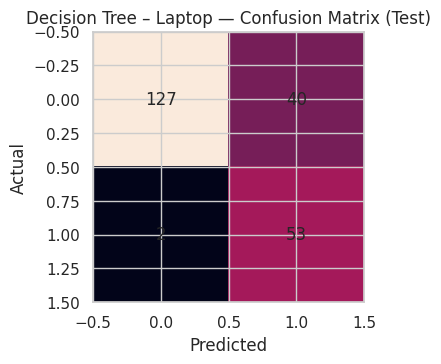

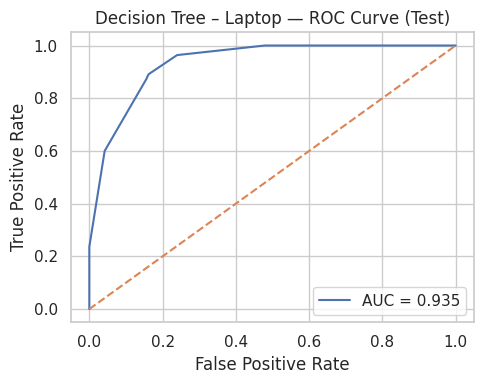

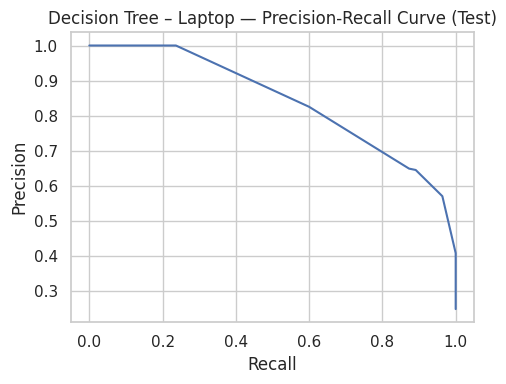


 Training Random Forest on Laptop segment...

===== Random Forest – Laptop — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9529    0.9701    0.9614       167
           1     0.9038    0.8545    0.8785        55

    accuracy                         0.9414       222
   macro avg     0.9284    0.9123    0.9200       222
weighted avg     0.9408    0.9414    0.9409       222



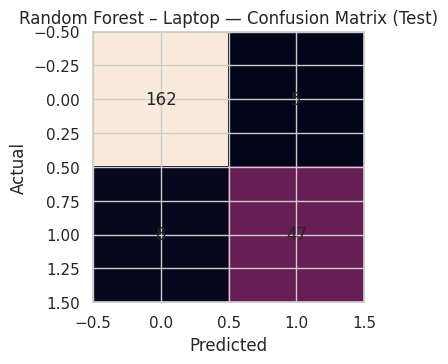

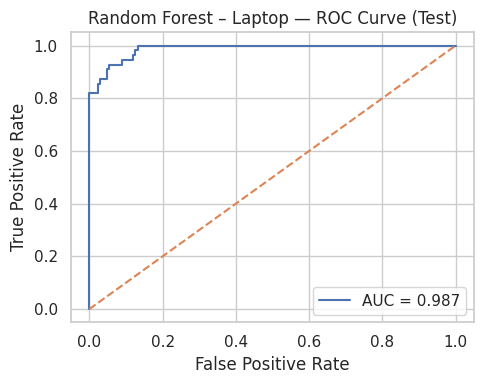

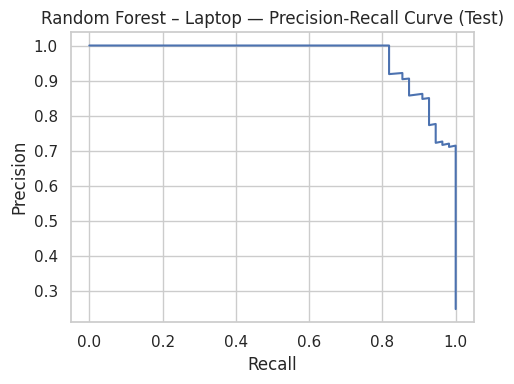


 Training Bagging on Laptop segment...

===== Bagging – Laptop — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.8830    0.9940    0.9352       167
           1     0.9706    0.6000    0.7416        55

    accuracy                         0.8964       222
   macro avg     0.9268    0.7970    0.8384       222
weighted avg     0.9047    0.8964    0.8872       222



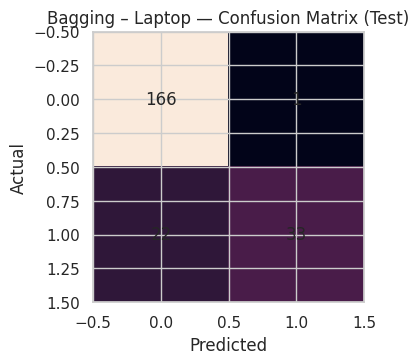

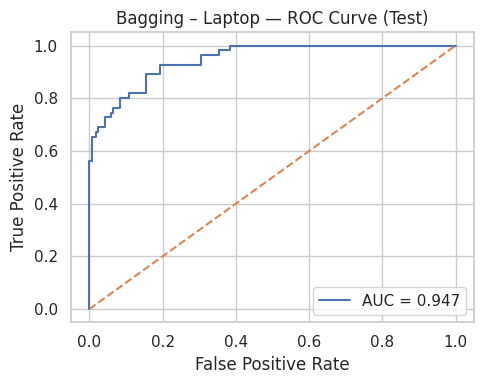

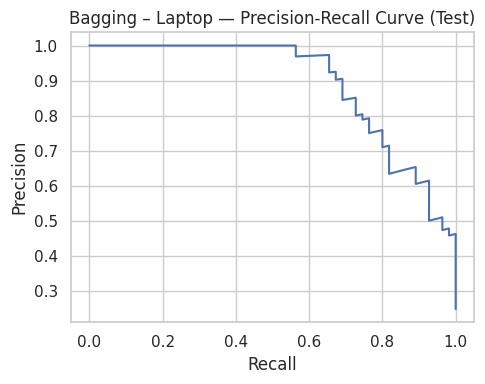


 Training AdaBoost on Laptop segment...

===== AdaBoost – Laptop — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.8429    0.9641    0.8994       167
           1     0.8065    0.4545    0.5814        55

    accuracy                         0.8378       222
   macro avg     0.8247    0.7093    0.7404       222
weighted avg     0.8339    0.8378    0.8206       222



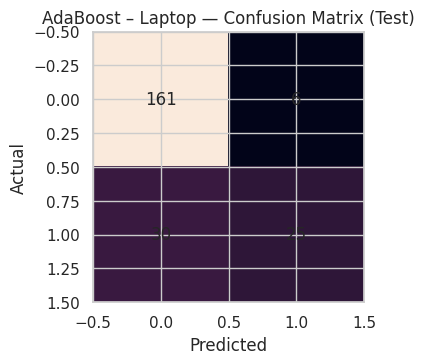

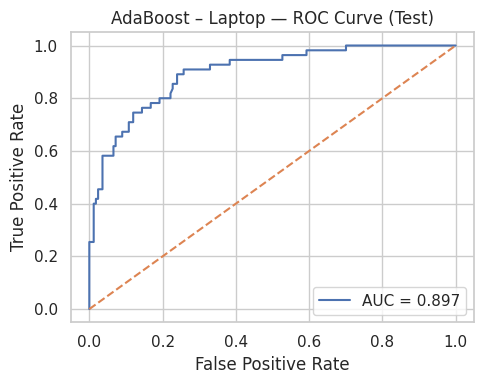

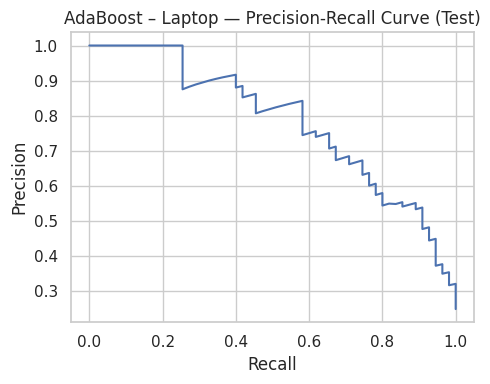


 Training Gradient Boosting on Laptop segment...

===== Gradient Boosting – Laptop — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9882    1.0000    0.9940       167
           1     1.0000    0.9636    0.9815        55

    accuracy                         0.9910       222
   macro avg     0.9941    0.9818    0.9878       222
weighted avg     0.9911    0.9910    0.9909       222



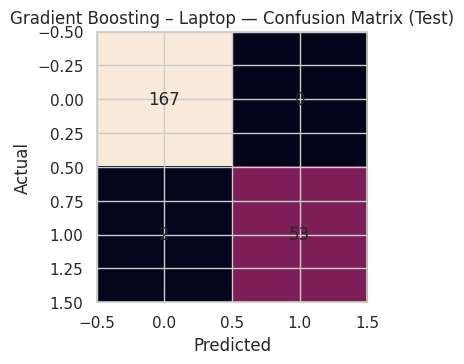

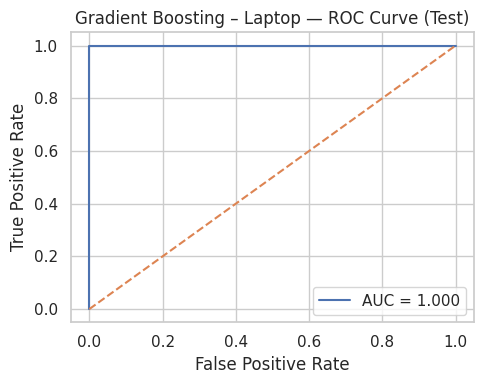

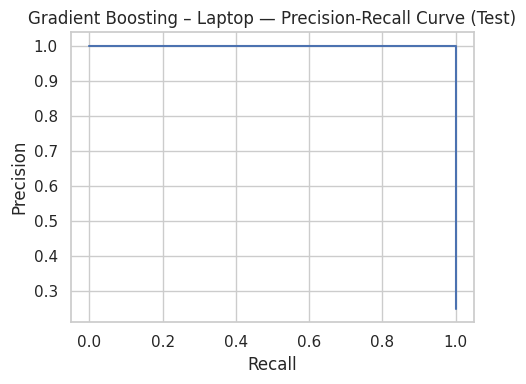


 Training XGBoost on Laptop segment...

===== XGBoost – Laptop — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9940    1.0000    0.9970       167
           1     1.0000    0.9818    0.9908        55

    accuracy                         0.9955       222
   macro avg     0.9970    0.9909    0.9939       222
weighted avg     0.9955    0.9955    0.9955       222



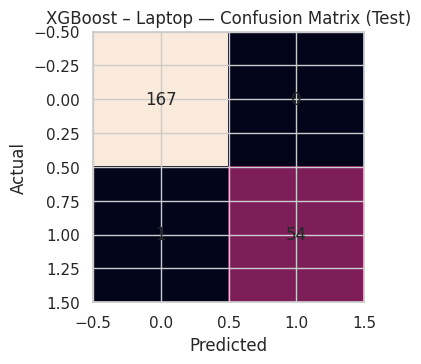

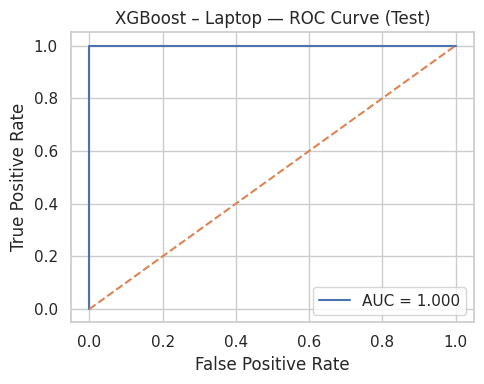

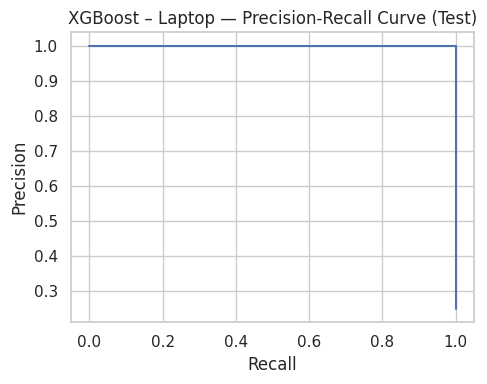

label  test_accuracy  test_precision  test_recall  \
0      Decision Tree – Laptop       0.810811        0.569892     0.963636   
1      Random Forest – Laptop       0.941441        0.903846     0.854545   
2            Bagging – Laptop       0.896396        0.970588     0.600000   
3           AdaBoost – Laptop       0.837838        0.806452     0.454545   
4  Gradient Boosting – Laptop       0.990991        1.000000     0.963636   
5            XGBoost – Laptop       0.995495        1.000000     0.981818   

    test_f1  test_roc_auc  
0  0.716216      0.934894  
1  0.878505      0.987371  
2  0.741573      0.947088  
3  0.581395      0.896734  
4  0.981481      1.000000  
5  0.990826      1.000000

In [ ]:
laptop_results = []
for name, model in models.items():
    print(f"\n Training {name} on Laptop segment...")
    metrics = train_and_evaluate(model, X_train_l, y_train_l, X_test_l, y_test_l, label=f"{name} – Laptop")
    laptop_results.append(metrics)

laptop_compare = pd.DataFrame(laptop_results)
display(laptop_compare[[
    'label','test_accuracy','test_precision','test_recall','test_f1','test_roc_auc'
]])


Train Models – Mobile Segment


🚀 Training Decision Tree on Mobile segment...

===== Decision Tree – Mobile — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9314    0.7495    0.8306       978
           1     0.3519    0.7112    0.4708       187

    accuracy                         0.7433      1165
   macro avg     0.6416    0.7304    0.6507      1165
weighted avg     0.8384    0.7433    0.7728      1165



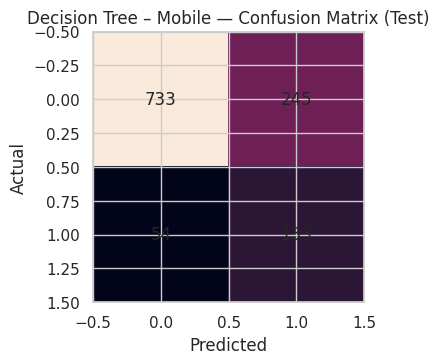

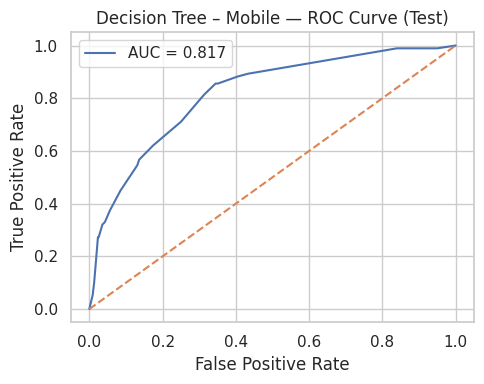

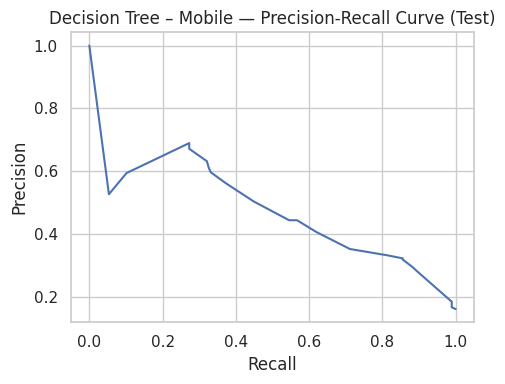


🚀 Training Random Forest on Mobile segment...

===== Random Forest – Mobile — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9361    0.9131    0.9244       978
           1     0.5972    0.6738    0.6332       187

    accuracy                         0.8747      1165
   macro avg     0.7666    0.7934    0.7788      1165
weighted avg     0.8817    0.8747    0.8777      1165



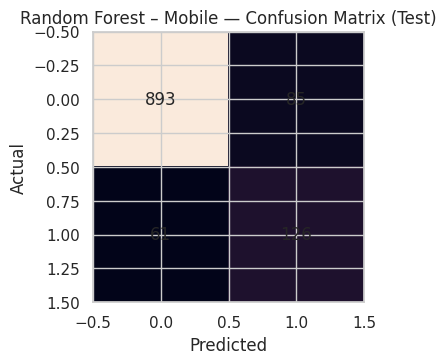

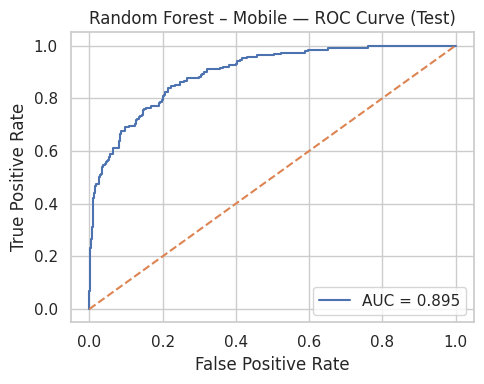

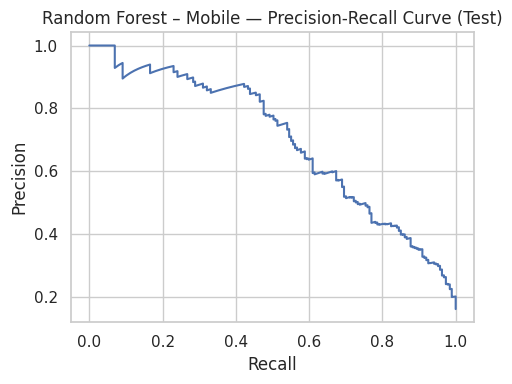


🚀 Training Bagging on Mobile segment...

===== Bagging – Mobile — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.8773    0.9867    0.9288       978
           1     0.8000    0.2781    0.4127       187

    accuracy                         0.8730      1165
   macro avg     0.8386    0.6324    0.6707      1165
weighted avg     0.8649    0.8730    0.8459      1165



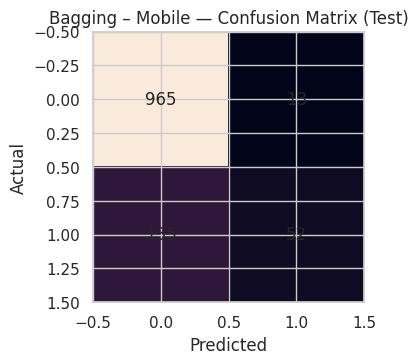

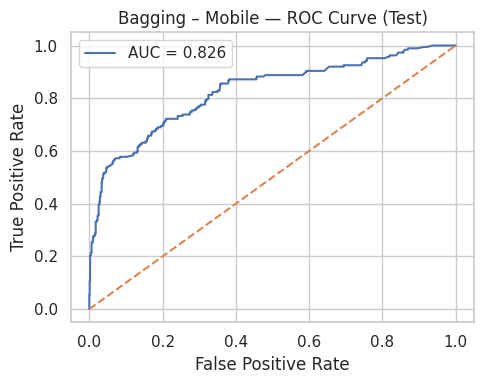

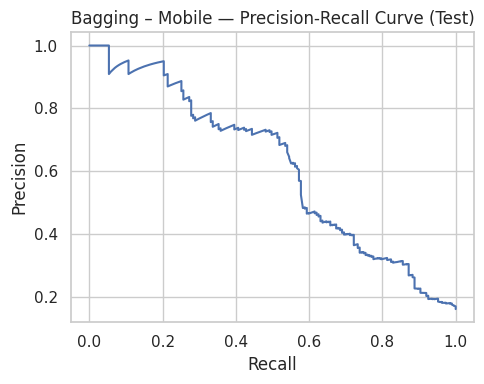


🚀 Training AdaBoost on Mobile segment...

===== AdaBoost – Mobile — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.8615    0.9918    0.9221       978
           1     0.7949    0.1658    0.2743       187

    accuracy                         0.8592      1165
   macro avg     0.8282    0.5788    0.5982      1165
weighted avg     0.8508    0.8592    0.8181      1165



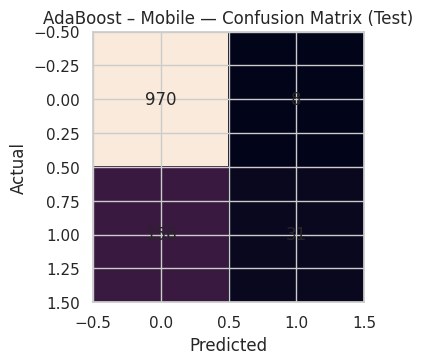

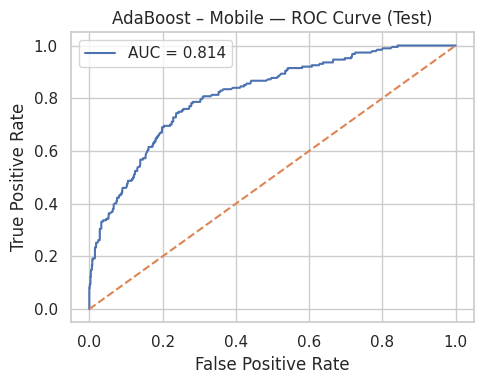

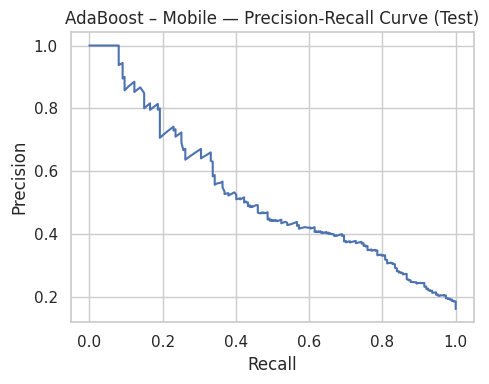


🚀 Training Gradient Boosting on Mobile segment...

===== Gradient Boosting – Mobile — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9503    0.9969    0.9731       978
           1     0.9784    0.7273    0.8344       187

    accuracy                         0.9536      1165
   macro avg     0.9644    0.8621    0.9037      1165
weighted avg     0.9548    0.9536    0.9508      1165



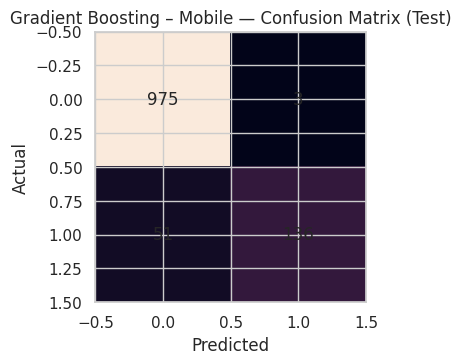

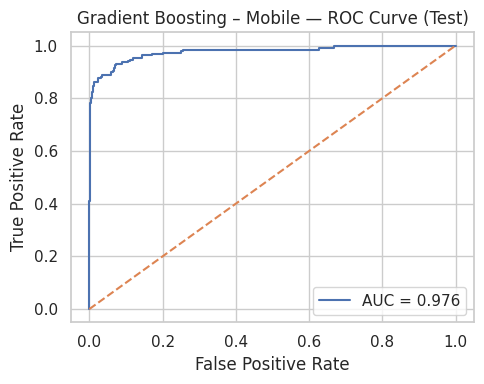

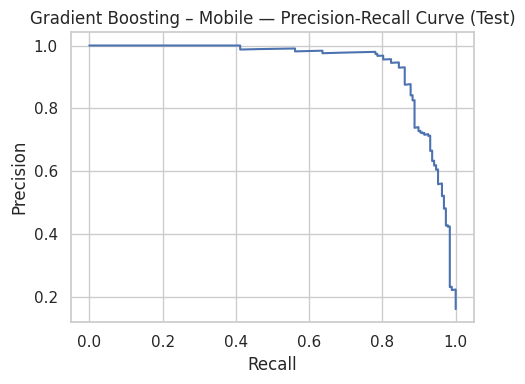


🚀 Training XGBoost on Mobile segment...

===== XGBoost – Mobile — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9336    0.9918    0.9618       978
           1     0.9365    0.6310    0.7540       187

    accuracy                         0.9339      1165
   macro avg     0.9350    0.8114    0.8579      1165
weighted avg     0.9341    0.9339    0.9285      1165



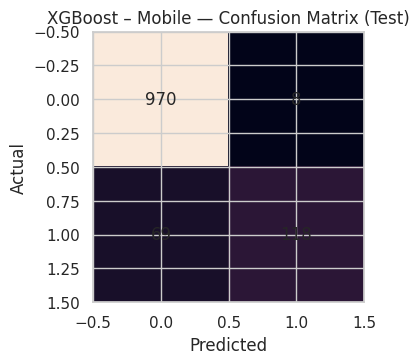

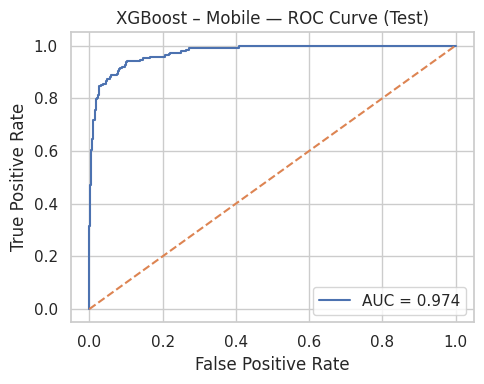

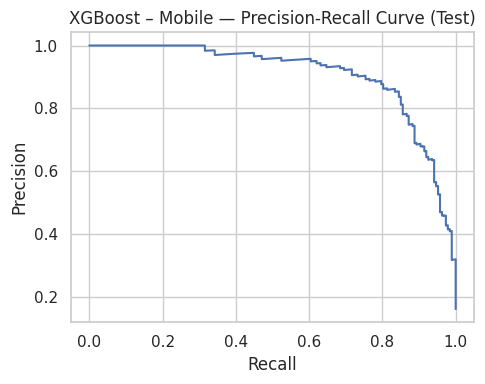

label  test_accuracy  test_precision  test_recall  \
0      Decision Tree – Mobile       0.743348        0.351852     0.711230   
1      Random Forest – Mobile       0.874678        0.597156     0.673797   
2            Bagging – Mobile       0.872961        0.800000     0.278075   
3           AdaBoost – Mobile       0.859227        0.794872     0.165775   
4  Gradient Boosting – Mobile       0.953648        0.978417     0.727273   
5            XGBoost – Mobile       0.933906        0.936508     0.631016   

    test_f1  test_roc_auc  
0  0.470796      0.816984  
1  0.633166      0.894924  
2  0.412698      0.825654  
3  0.274336      0.813734  
4  0.834356      0.976045  
5  0.753994      0.974252

In [ ]:
mobile_results = []
for name, model in models.items():
    print(f"\n🚀 Training {name} on Mobile segment...")
    metrics = train_and_evaluate(model, X_train_m, y_train_m, X_test_m, y_test_m, label=f"{name} – Mobile")
    mobile_results.append(metrics)

mobile_compare = pd.DataFrame(mobile_results)
display(mobile_compare[[
    'label','test_accuracy','test_precision','test_recall','test_f1','test_roc_auc'
]])


Comparison of Model Performance

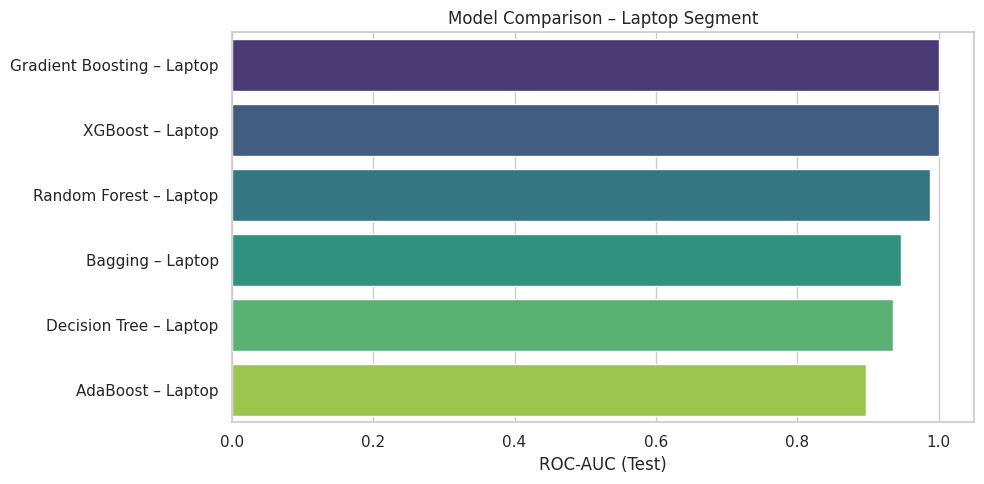

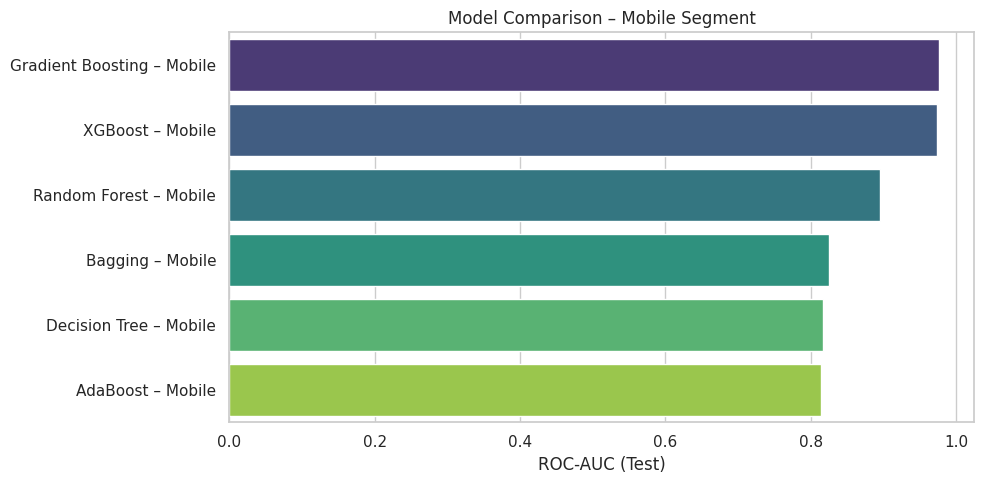

In [ ]:
def plot_model_comparison(df, title):
    plt.figure(figsize=(10,5))
    df_sorted = df.sort_values('test_roc_auc', ascending=False)
    sns.barplot(x='test_roc_auc', y='label', data=df_sorted, palette='viridis')
    plt.title(title)
    plt.xlabel('ROC-AUC (Test)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

plot_model_comparison(laptop_compare, 'Model Comparison – Laptop Segment')
plot_model_comparison(mobile_compare, 'Model Comparison – Mobile Segment')


MODEL PERFORMANCE IMPROVEMENT USING HYPERPARAMETER TUNING

In [ ]:
def tune_model(model, param_grid, X_train, y_train, X_test, y_test, label):
    """
    Runs GridSearchCV on the given model and returns the best estimator with metrics.
    """
    grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)

    print(f"\nBest Parameters for {label}: {grid.best_params_}")
    best_model = grid.best_estimator_

    # ✅ Fixed call (only one label argument)
    metrics, _, _ = evaluate_classifier(best_model, X_train, y_train, X_test, y_test, label + " (Tuned)")

    return metrics, best_model


In [ ]:
#Define Parameter Grids

# random forest grid
rf_grid = {
    'n_estimators': [100,200],
    'max_depth': [5,7,10],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2],
    'bootstrap': [True, False]
}

# gradient boosting grid
gb_grid = {
    'n_estimators': [100, 150, 250],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3,5,7],
    'subsample':[0.8, 1.0]
}

#xgboost grid
xgb_grid = {
    'n_estimators': [100,150,200],
    'learning_rate':[0.05, 0.1],
    'max_depth': [3,5,7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


Tuning – Laptop Segment

Tuning Random Forest – Laptop...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best Parameters for Random Forest (Laptop): {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

===== Random Forest (Laptop) (Tuned) — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       167
           1     1.0000    1.0000    1.0000        55

    accuracy                         1.0000       222
   macro avg     1.0000    1.0000    1.0000       222
weighted avg     1.0000    1.0000    1.0000       222



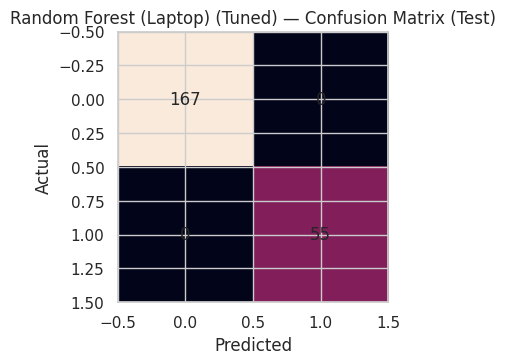

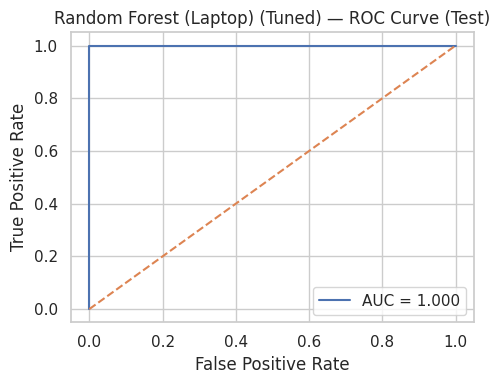

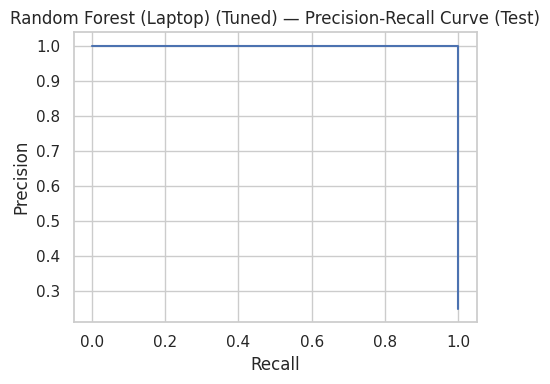

Tuning Gradient Boosting – Laptop...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Parameters for Gradient Boosting (Laptop): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250, 'subsample': 0.8}

===== Gradient Boosting (Laptop) (Tuned) — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       167
           1     1.0000    1.0000    1.0000        55

    accuracy                         1.0000       222
   macro avg     1.0000    1.0000    1.0000       222
weighted avg     1.0000    1.0000    1.0000       222



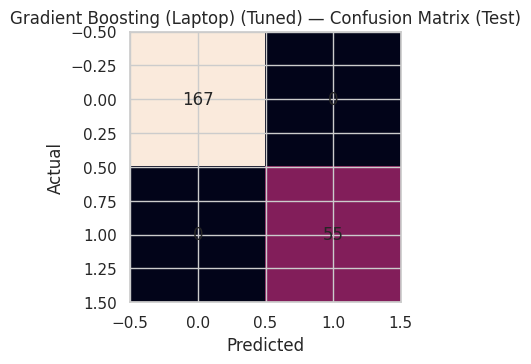

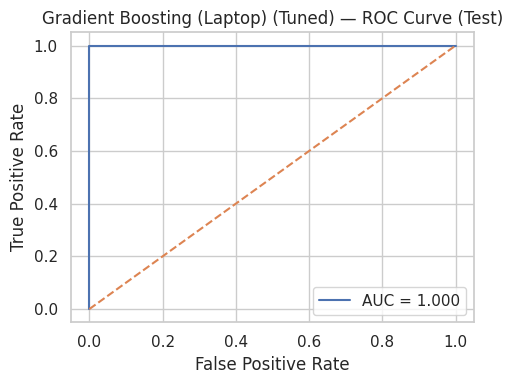

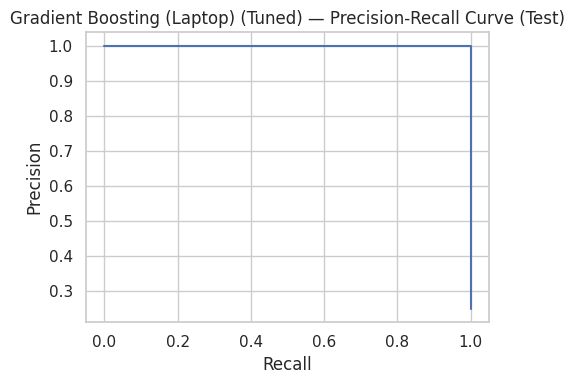

Tuning XGBoost – Laptop...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters for XGBoost (Laptop): {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

===== XGBoost (Laptop) (Tuned) — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       167
           1     1.0000    1.0000    1.0000        55

    accuracy                         1.0000       222
   macro avg     1.0000    1.0000    1.0000       222
weighted avg     1.0000    1.0000    1.0000       222



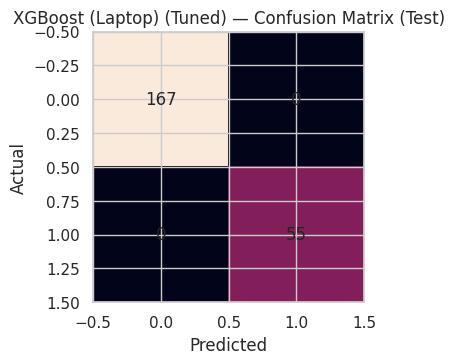

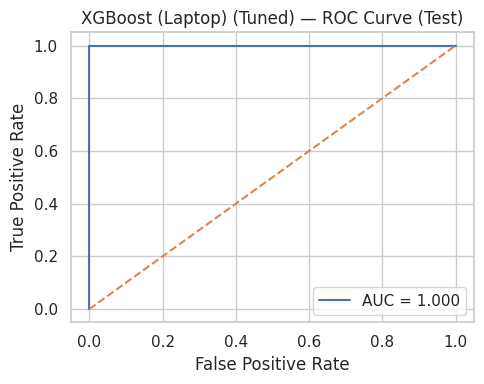

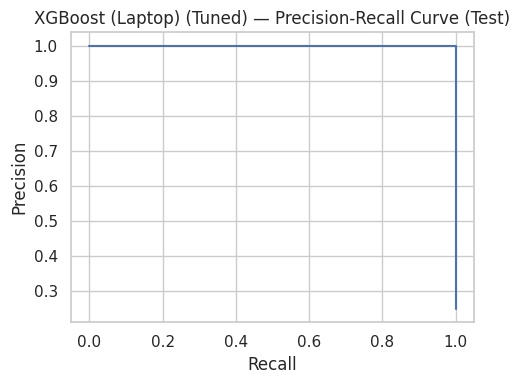

label  test_accuracy  test_precision  \
0      Random Forest (Laptop) (Tuned)            1.0             1.0   
1  Gradient Boosting (Laptop) (Tuned)            1.0             1.0   
2            XGBoost (Laptop) (Tuned)            1.0             1.0   

   test_recall  test_f1  test_roc_auc  
0          1.0      1.0           1.0  
1          1.0      1.0           1.0  
2          1.0      1.0           1.0

In [ ]:
tuned_laptop_results = []

print("Tuning Random Forest – Laptop...")
rf_lap_metrics, rf_lap_best = tune_model(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    rf_grid, X_train_l, y_train_l, X_test_l, y_test_l,
    label='Random Forest (Laptop)'
)
tuned_laptop_results.append(rf_lap_metrics)


print("Tuning Gradient Boosting – Laptop...")
gb_lap_metrics, gb_lap_best = tune_model(
    GradientBoostingClassifier(random_state=42),
    gb_grid, X_train_l, y_train_l, X_test_l, y_test_l,
    label='Gradient Boosting (Laptop)'
)
tuned_laptop_results.append(gb_lap_metrics)


print("Tuning XGBoost – Laptop...")
xgb_lap_metrics, xgb_lap_best = tune_model(
    XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    xgb_grid, X_train_l, y_train_l, X_test_l, y_test_l,
    label='XGBoost (Laptop)'
)
tuned_laptop_results.append(xgb_lap_metrics)


# 🧾 Combine all tuned results
tuned_laptop_compare = pd.DataFrame(tuned_laptop_results)
display(tuned_laptop_compare[[
    'label', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc'
]])

Tuning – Mobile Segment

Tuning Random Forest – Mobile...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Best Parameters for Random Forest (Mobile): {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

===== Random Forest (Mobile) (Tuned) — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9635    0.9714    0.9674       978
           1     0.8436    0.8075    0.8251       187

    accuracy                         0.9451      1165
   macro avg     0.9035    0.8894    0.8963      1165
weighted avg     0.9442    0.9451    0.9446      1165



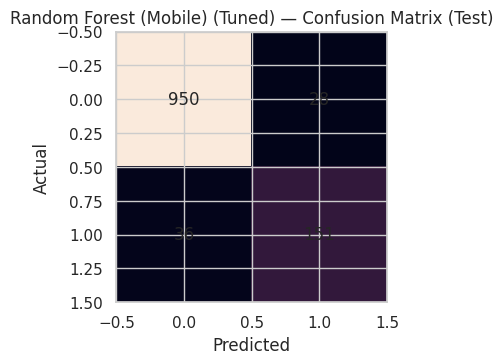

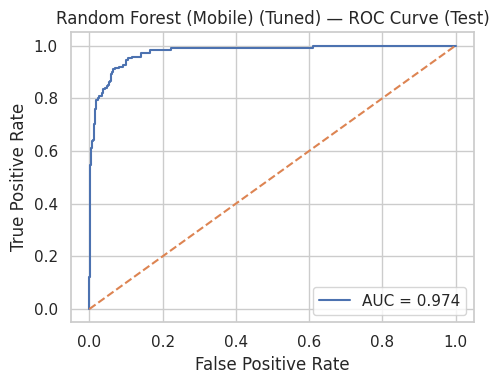

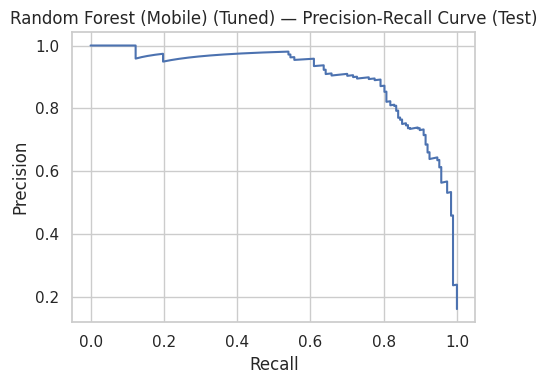

Tuning Gradient Boosting – Mobile...
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Parameters for Gradient Boosting (Mobile): {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 250, 'subsample': 0.8}

===== Gradient Boosting (Mobile) (Tuned) — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9731    0.9980    0.9854       978
           1     0.9877    0.8556    0.9169       187

    accuracy                         0.9751      1165
   macro avg     0.9804    0.9268    0.9511      1165
weighted avg     0.9754    0.9751    0.9744      1165



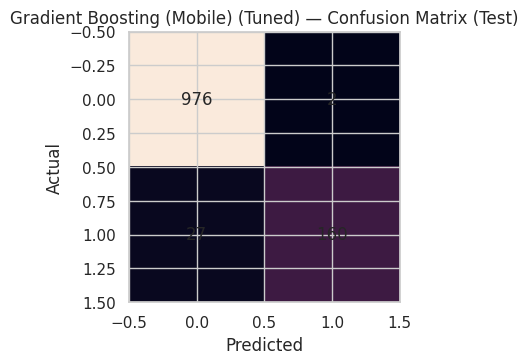

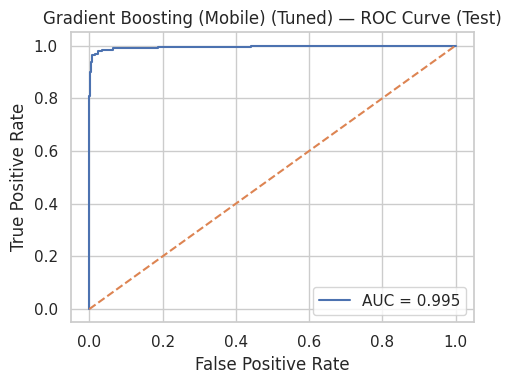

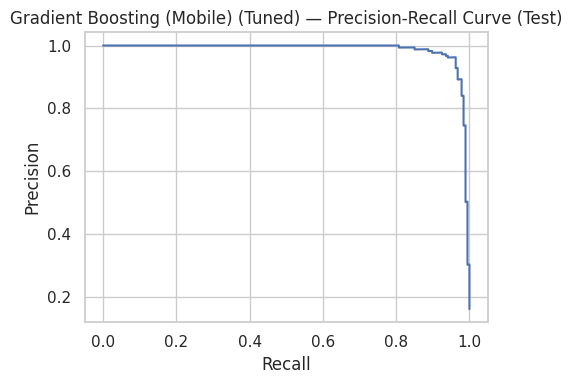

Tuning XGBoost – Mobile...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Best Parameters for XGBoost (Mobile): {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

===== XGBoost (Mobile) (Tuned) — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9653    0.9969    0.9809       978
           1     0.9806    0.8128    0.8889       187

    accuracy                         0.9674      1165
   macro avg     0.9730    0.9049    0.9349      1165
weighted avg     0.9678    0.9674    0.9661      1165



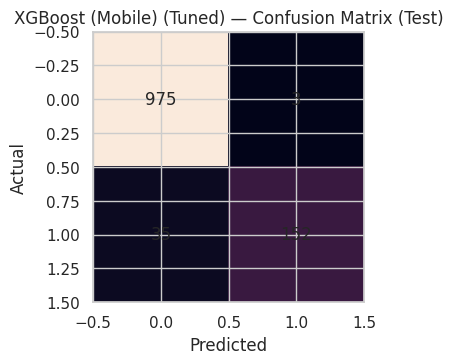

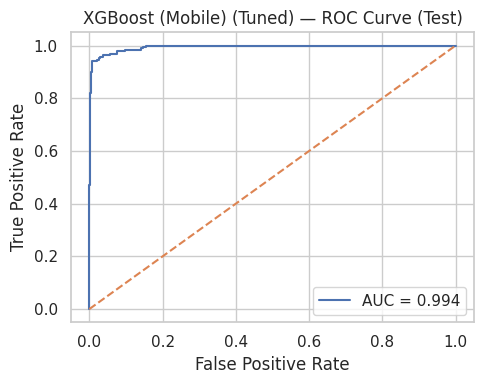

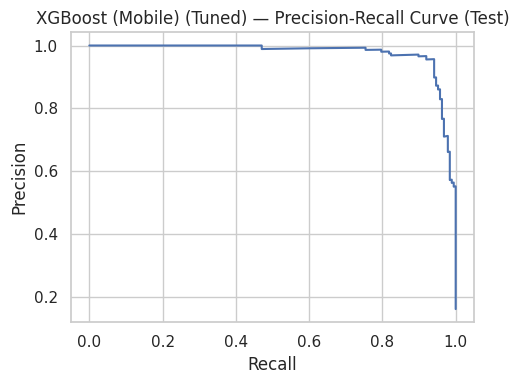

label  test_accuracy  test_precision  \
0      Random Forest (Mobile) (Tuned)       0.945064        0.843575   
1  Gradient Boosting (Mobile) (Tuned)       0.975107        0.987654   
2            XGBoost (Mobile) (Tuned)       0.967382        0.980645   

   test_recall   test_f1  test_roc_auc  
0     0.807487  0.825137      0.974394  
1     0.855615  0.916905      0.995281  
2     0.812834  0.888889      0.994237

In [ ]:
tuned_mobile_results = []
print("Tuning Random Forest – Mobile...")
rf_mob_metrics, rf_mob_best = tune_model(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    rf_grid, X_train_m, y_train_m, X_test_m, y_test_m, label='Random Forest (Mobile)'
)
tuned_mobile_results.append(rf_mob_metrics)

print("Tuning Gradient Boosting – Mobile...")
gb_mob_metrics, gb_mob_best = tune_model(
    GradientBoostingClassifier(random_state=42),
    gb_grid, X_train_m, y_train_m, X_test_m, y_test_m, label='Gradient Boosting (Mobile)'
)
tuned_mobile_results.append(gb_mob_metrics)

print("vTuning XGBoost – Mobile...")
xgb_mob_metrics, xgb_mob_best = tune_model(
    XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    xgb_grid, X_train_m, y_train_m, X_test_m, y_test_m, label='XGBoost (Mobile)'
)
tuned_mobile_results.append(xgb_mob_metrics)

tuned_mobile_compare = pd.DataFrame(tuned_mobile_results)
display(tuned_mobile_compare[['label','test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']])


Visualize Improved Performance

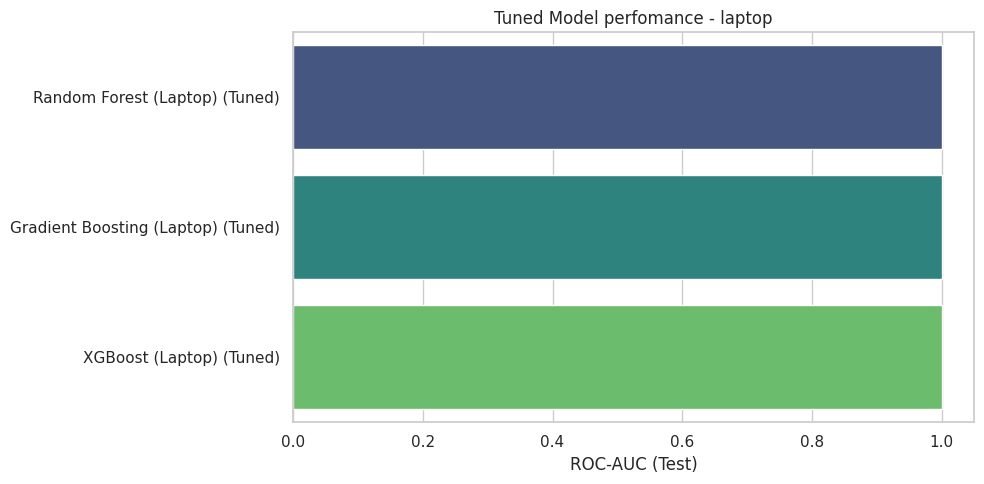

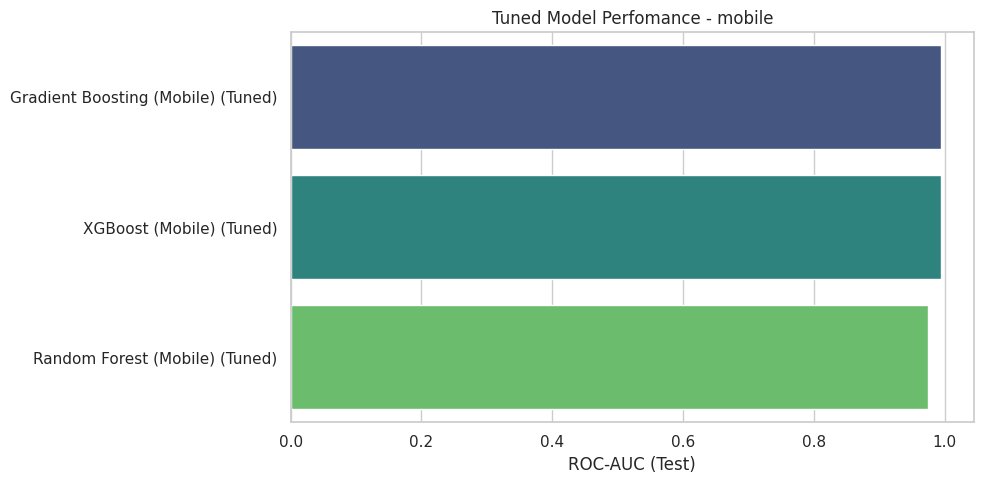

In [ ]:
plot_model_comparison(tuned_laptop_compare, "Tuned Model perfomance - laptop")
plot_model_comparison(tuned_mobile_compare, "Tuned Model Perfomance - mobile")

MODEL PERFORMANCE COMPARISON & FINAL MODEL SELECTION

 Tuned model summary - laptop


label  test_accuracy  test_precision  \
0      Random Forest (Laptop) (Tuned)            1.0             1.0   
1  Gradient Boosting (Laptop) (Tuned)            1.0             1.0   
2            XGBoost (Laptop) (Tuned)            1.0             1.0   

   test_recall  test_f1  test_roc_auc  
0          1.0      1.0           1.0  
1          1.0      1.0           1.0  
2          1.0      1.0           1.0

tuned model summary - mobile


label  test_accuracy  test_precision  \
0      Random Forest (Mobile) (Tuned)       0.945064        0.843575   
1  Gradient Boosting (Mobile) (Tuned)       0.975107        0.987654   
2            XGBoost (Mobile) (Tuned)       0.967382        0.980645   

   test_recall   test_f1  test_roc_auc  
0     0.807487  0.825137      0.974394  
1     0.855615  0.916905      0.995281  
2     0.812834  0.888889      0.994237

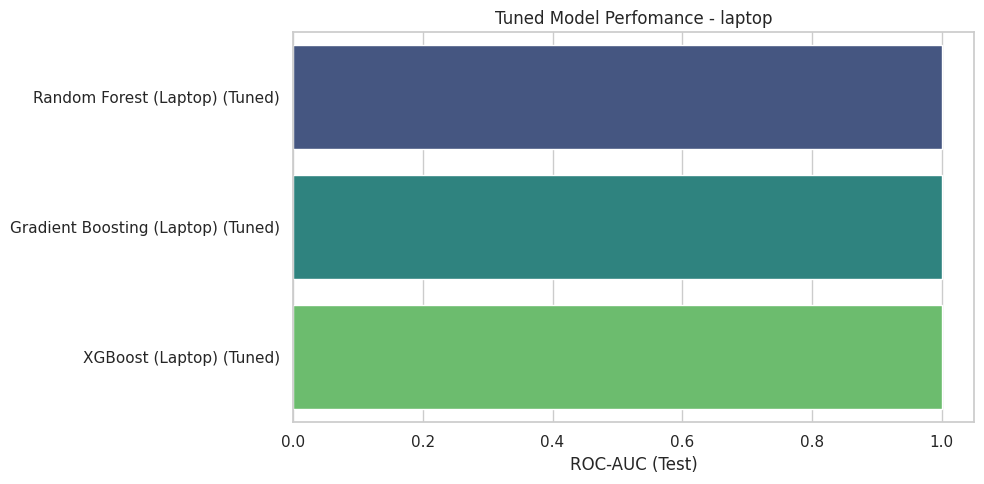

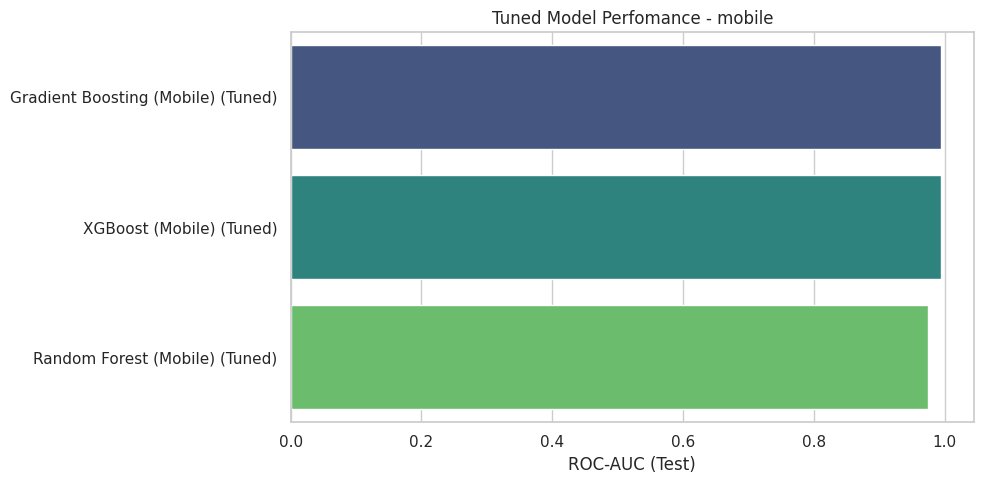

In [ ]:
#Combine Tuned Results and Compare
print(" Tuned model summary - laptop")
display(tuned_laptop_compare[['label', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']])

print("tuned model summary - mobile")
display(tuned_mobile_compare[['label', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']])

plot_model_comparison(tuned_laptop_compare, "Tuned Model Perfomance - laptop")
plot_model_comparison(tuned_mobile_compare, "Tuned Model Perfomance - mobile")


Identify Best Models

In [ ]:
best_lap = tuned_laptop_compare.loc[tuned_laptop_compare['test_roc_auc'].idxmax()]
best_mob = tuned_laptop_compare.loc[tuned_laptop_compare['test_roc_auc'].idxmax()]

print(" best laptop model:", best_lap['label'])
print(" best mobile model:", best_mob['label'])


 best laptop model: Random Forest (Laptop) (Tuned)
 best mobile model: Random Forest (Laptop) (Tuned)


Re-Evaluate Best Models on Test Set

final evaluation - laptop model

===== finale model(laptop) — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       167
           1     1.0000    1.0000    1.0000        55

    accuracy                         1.0000       222
   macro avg     1.0000    1.0000    1.0000       222
weighted avg     1.0000    1.0000    1.0000       222



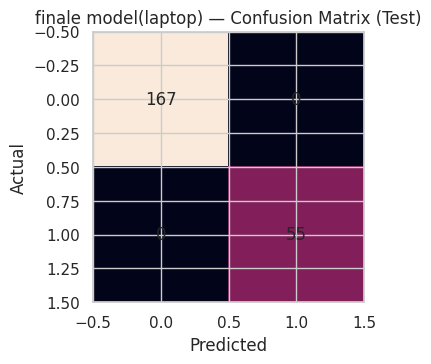

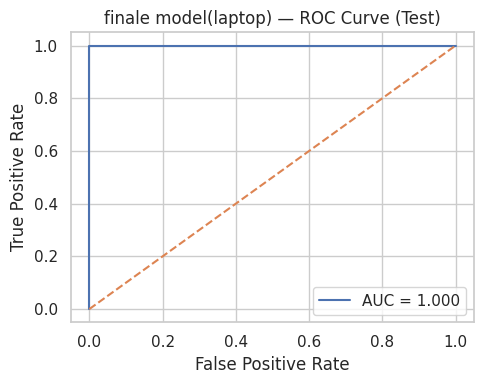

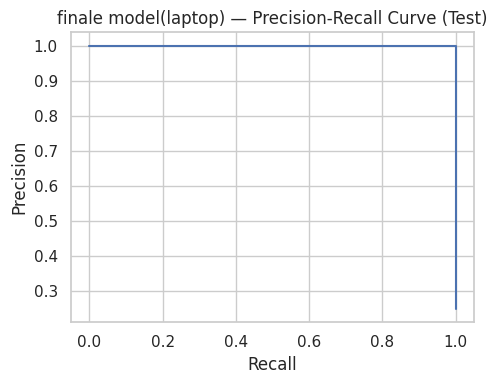

final evaluation - mobile model

===== final model(mobile) — Classification Report (Test) =====
              precision    recall  f1-score   support

           0     0.9653    0.9969    0.9809       978
           1     0.9806    0.8128    0.8889       187

    accuracy                         0.9674      1165
   macro avg     0.9730    0.9049    0.9349      1165
weighted avg     0.9678    0.9674    0.9661      1165



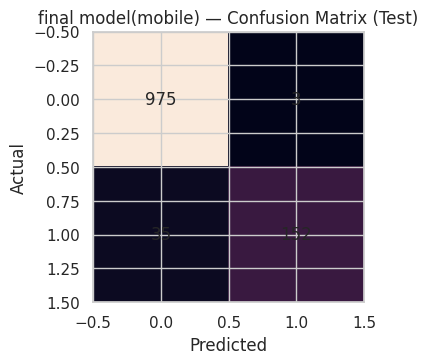

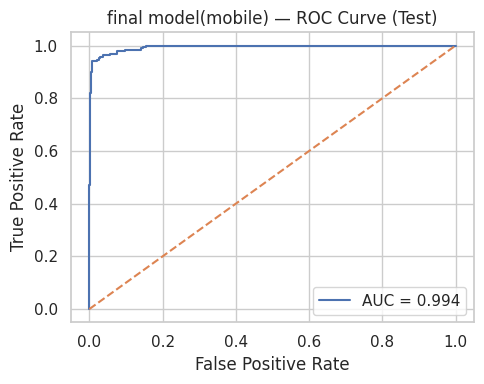

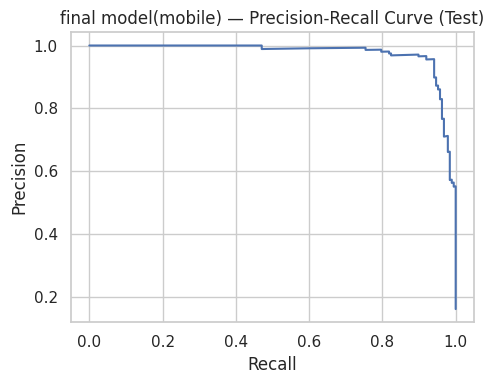

In [ ]:
final_lap_model = xgb_lap_best
final_mob_model = xgb_mob_best

print("final evaluation - laptop model")
final_lap_metrics, lap_probs, lap_preds = evaluate_classifier(
    final_lap_model, X_train_l, y_train_l, X_test_l, y_test_l, label='finale model(laptop)'
)

print("final evaluation - mobile model")
final_mob_metrics, mob_probs, mob_preds = evaluate_classifier(
    final_mob_model, X_train_m, y_train_m, X_test_m, y_test_m, label='final model(mobile)'
)



Feature Importance (Tree-Based Models Only)

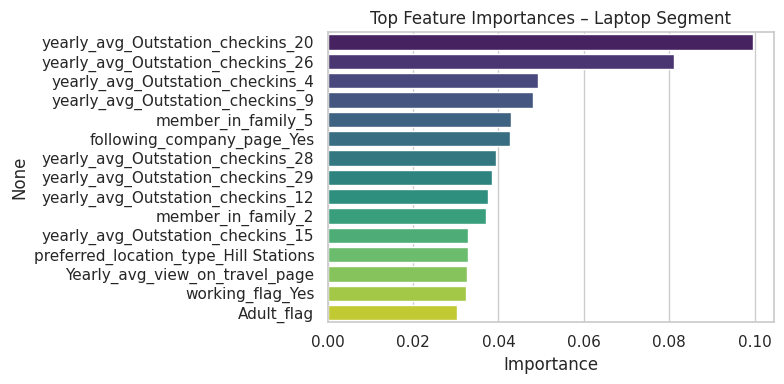

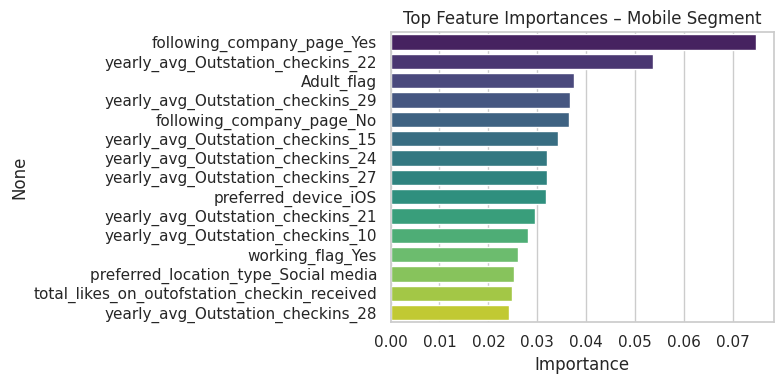

In [ ]:
def show_feature_importance(model, X_train, title):
    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=X_train.columns)
        top_imp = importances.sort_values(ascending=False).head(15)
        plt.figure(figsize=(8,4))
        sns.barplot(x=top_imp.values, y=top_imp.index, palette='viridis')
        plt.title(title)
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()
    else:
        print(" Feature importances not available for this model type.")

show_feature_importance(final_lap_model, X_train_l, "Top Feature Importances – Laptop Segment")
show_feature_importance(final_mob_model, X_train_m, "Top Feature Importances – Mobile Segment")


Save Final Comparison Summary

In [ ]:
final_summary = pd.DataFrame([final_lap_metrics, final_mob_metrics])
display(final_summary[['label','test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']])


label  test_accuracy  test_precision  test_recall   test_f1  \
0  finale model(laptop)       1.000000        1.000000     1.000000  1.000000   
1   final model(mobile)       0.967382        0.980645     0.812834  0.888889   

   test_roc_auc  
0      1.000000  
1      0.994237